## Import

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score  

from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram

import category_encoders as ce

## Heading K-means Baru

In [35]:
ds = pd.read_excel('Dataset_Kedatangan_Wisatawan_Mancanegara_Berdasarkan_Pintu_Masuk.xlsx')
ds.head()
len(ds)

1824

In [36]:
encoder = ce.OrdinalEncoder(cols=['Bandara'])

ddd = encoder.fit_transform(ds)
ddd.tail()
# // ddd = data
# // ds = data_object

,Bandara,Kedatangan
1819,19,6541
1820,19,7024
1821,19,6306
1822,19,6918
1823,19,9826


## K-Means 

In [42]:
def kmeans_train(n_cluster):
    cluster_kmeans = KMeans(n_clusters=n_cluster, random_state=5)
    visualizer = SilhouetteVisualizer(cluster_kmeans, color='yellowbrick')
    
    visualizer.fit(ddd)
    visualizer.show()

    cluster_labels = cluster_kmeans.fit_predict(ddd)
    silhouette_avg = silhouette_score(ddd, cluster_labels)
    davies_score = davies_bouldin_score(ddd, cluster_labels)

    silhouette_round = round(silhouette_avg,4)
    davies_round = round(davies_score,4)

    return cluster_labels, silhouette_round, davies_round
    
def kmeans_show_plot(labels,cluster):
    # Salin ddd dan tambahkan label cluster
    df_kmeans = ddd.copy()
    df_kmeans['Cluster'] = labels
    
    df_kmeans_object = ds.copy()
    df_kmeans_object['Cluster'] = labels

    # Set ukuran font untuk plot
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18
    
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=SMALL_SIZE)
    plt.rc('ytick', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=BIGGER_SIZE)
    
    # Plot pertama: Boxplot untuk variabel Kedatangan
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='Cluster', y='Kedatangan', data=df_kmeans, palette='hls')
    plt.title('Distribusi Kedatangan per Cluster ')
    plt.show()

    plt.figure(figsize=(15, 7))
    sns.countplot(x='Bandara', hue='Cluster', data=df_kmeans_object, palette='turbo')
    plt.xticks(rotation=270)
    plt.title('Distribusi Bandara dalam Setiap Cluster')
    plt.show()

    cluster_stats = []
    cluster_stats.append(f"Jumlah Cluster --> {cluster}")
    for cluster in df_kmeans['Cluster'].unique():
        min_value = df_kmeans[df_kmeans['Cluster'] == cluster]['Kedatangan'].min()
        max_value = df_kmeans[df_kmeans['Cluster'] == cluster]['Kedatangan'].max()
        min_value_formatted = format(min_value, ',').replace(',', '.')
        max_value_formatted = format(max_value, ',').replace(',', '.')
        cluster_stats.append(f'Cluster {cluster}: dari {min_value_formatted} - {max_value_formatted}')
    cluster_stats.append('')
    return cluster_stats

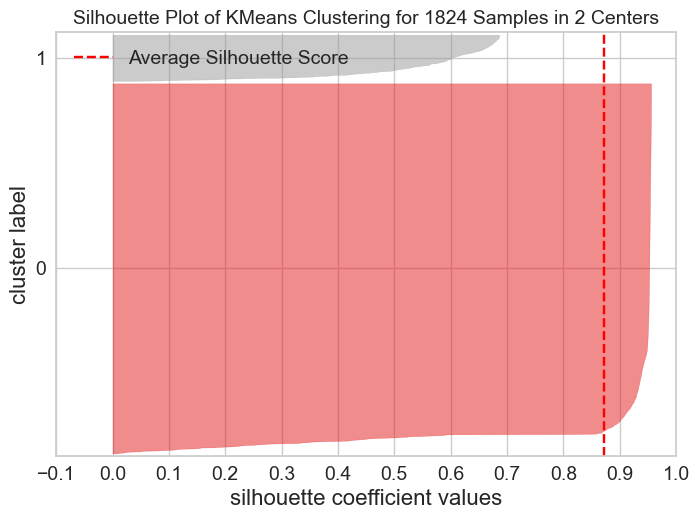

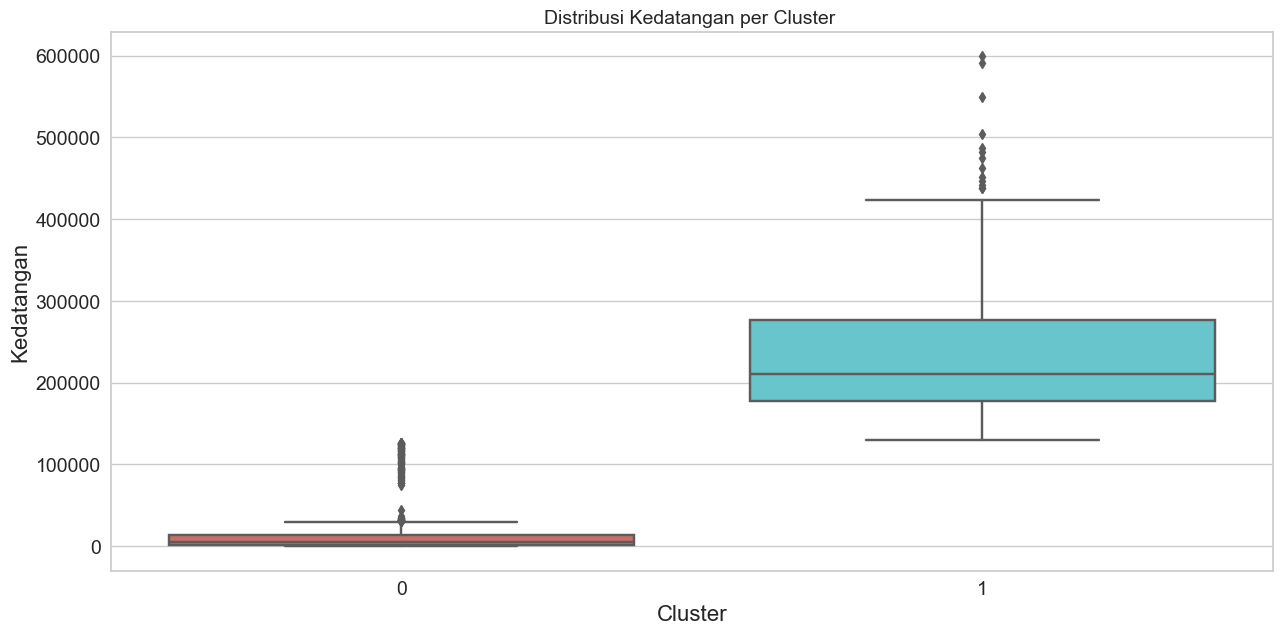

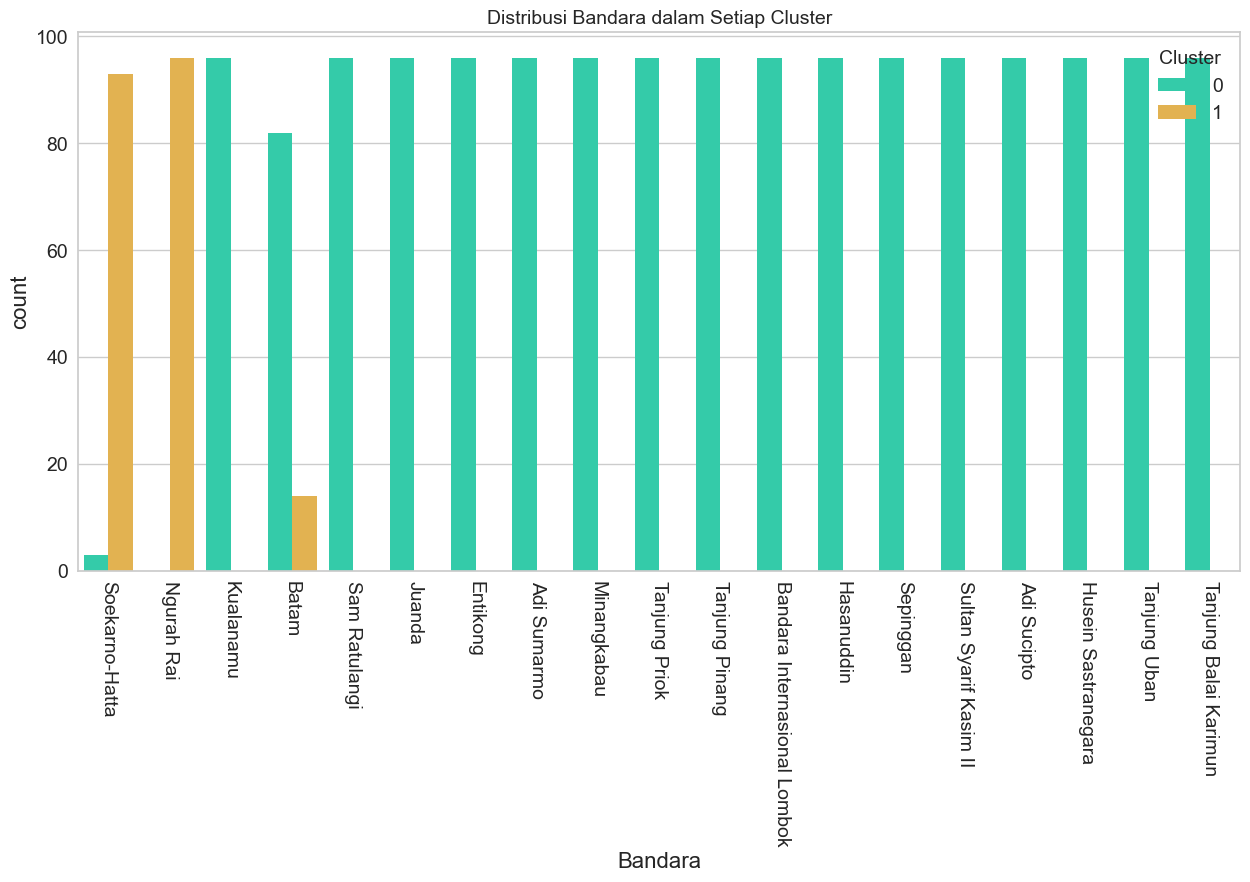

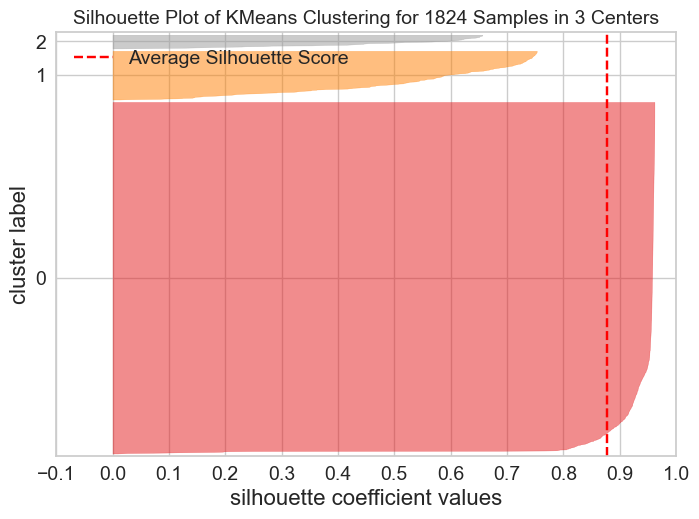

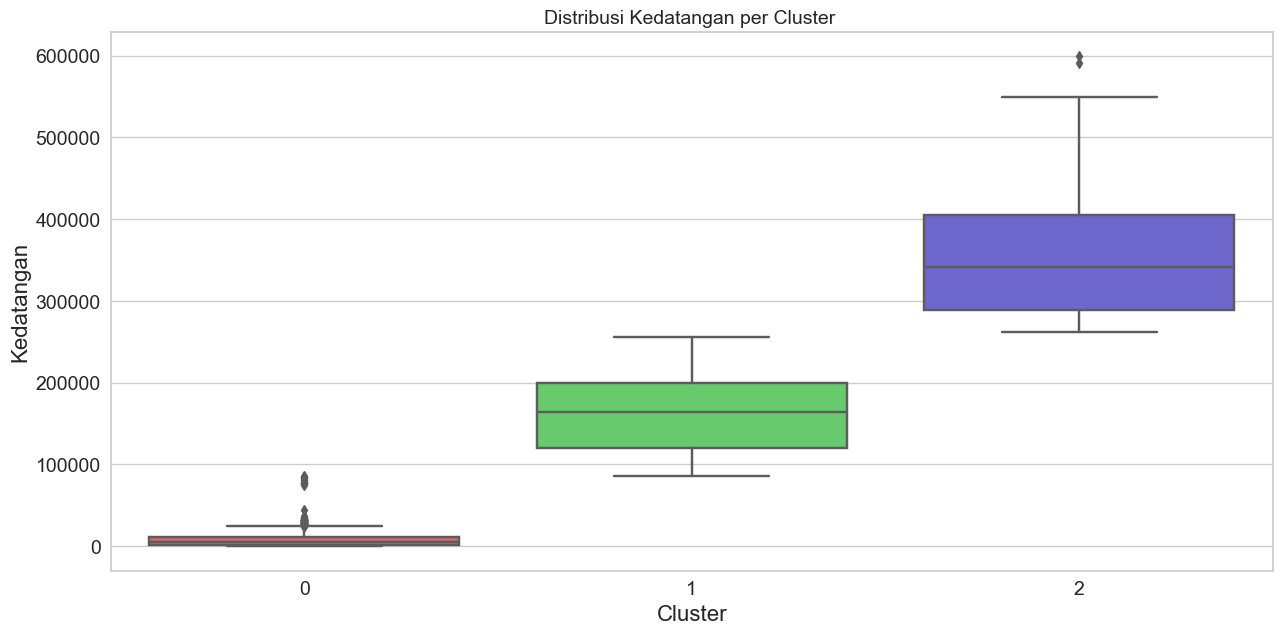

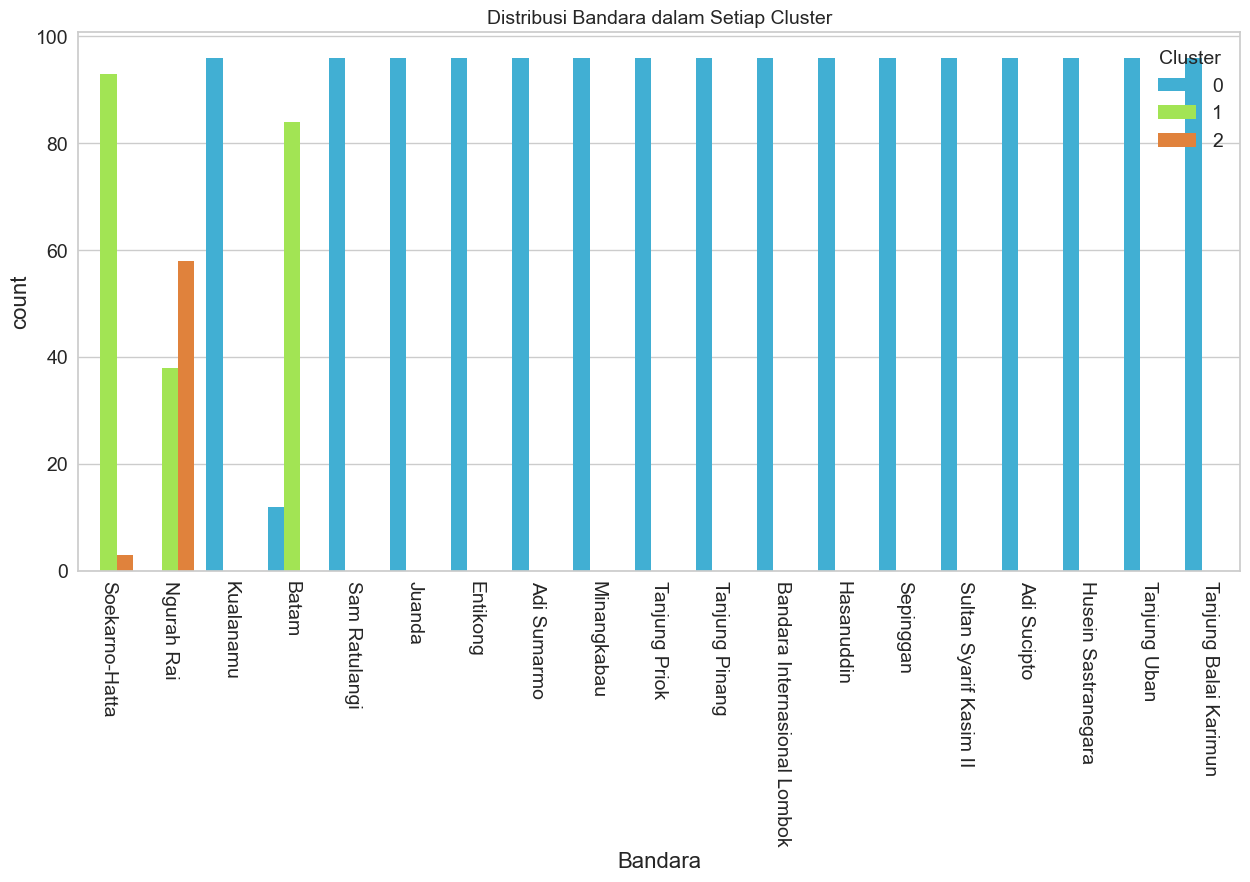

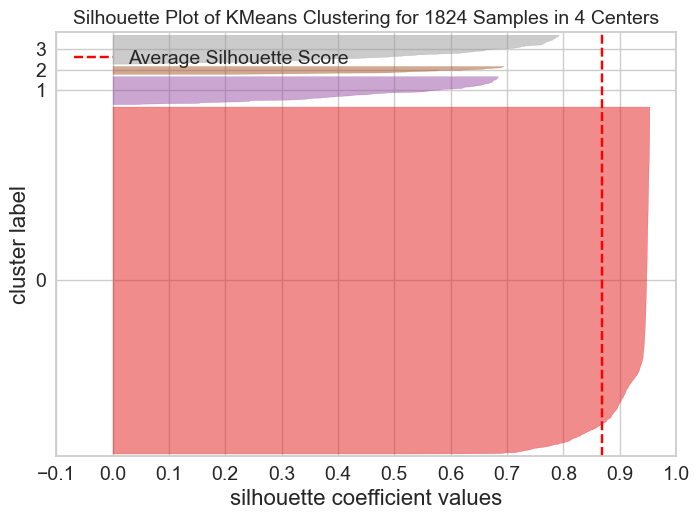

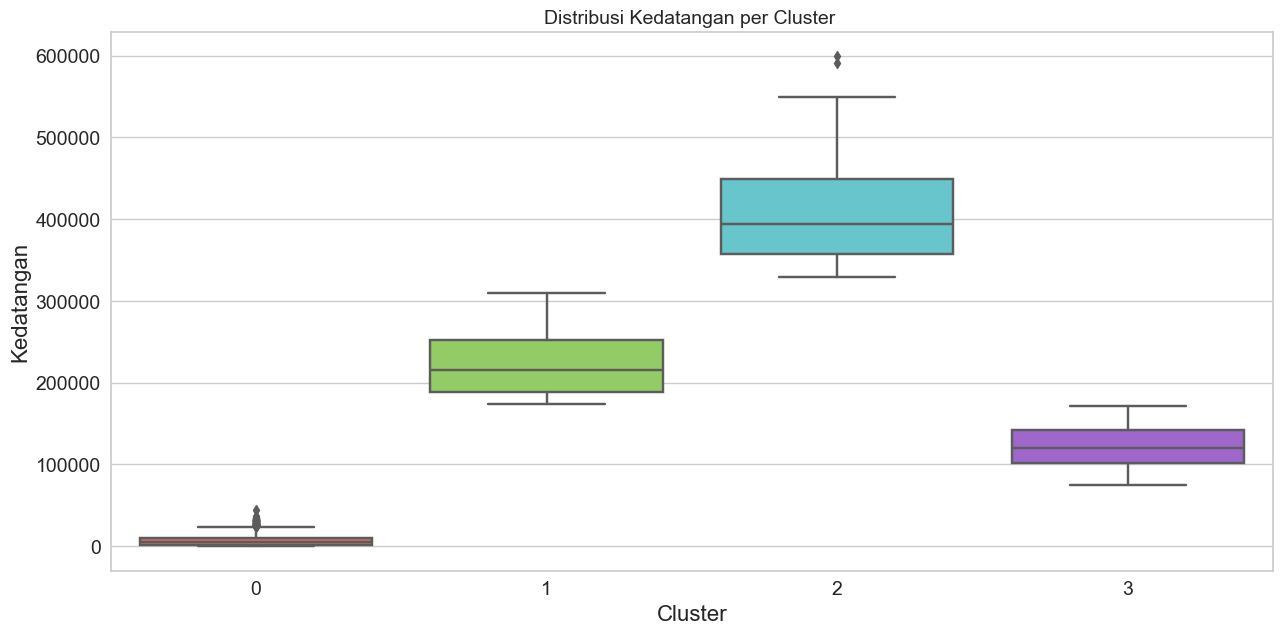

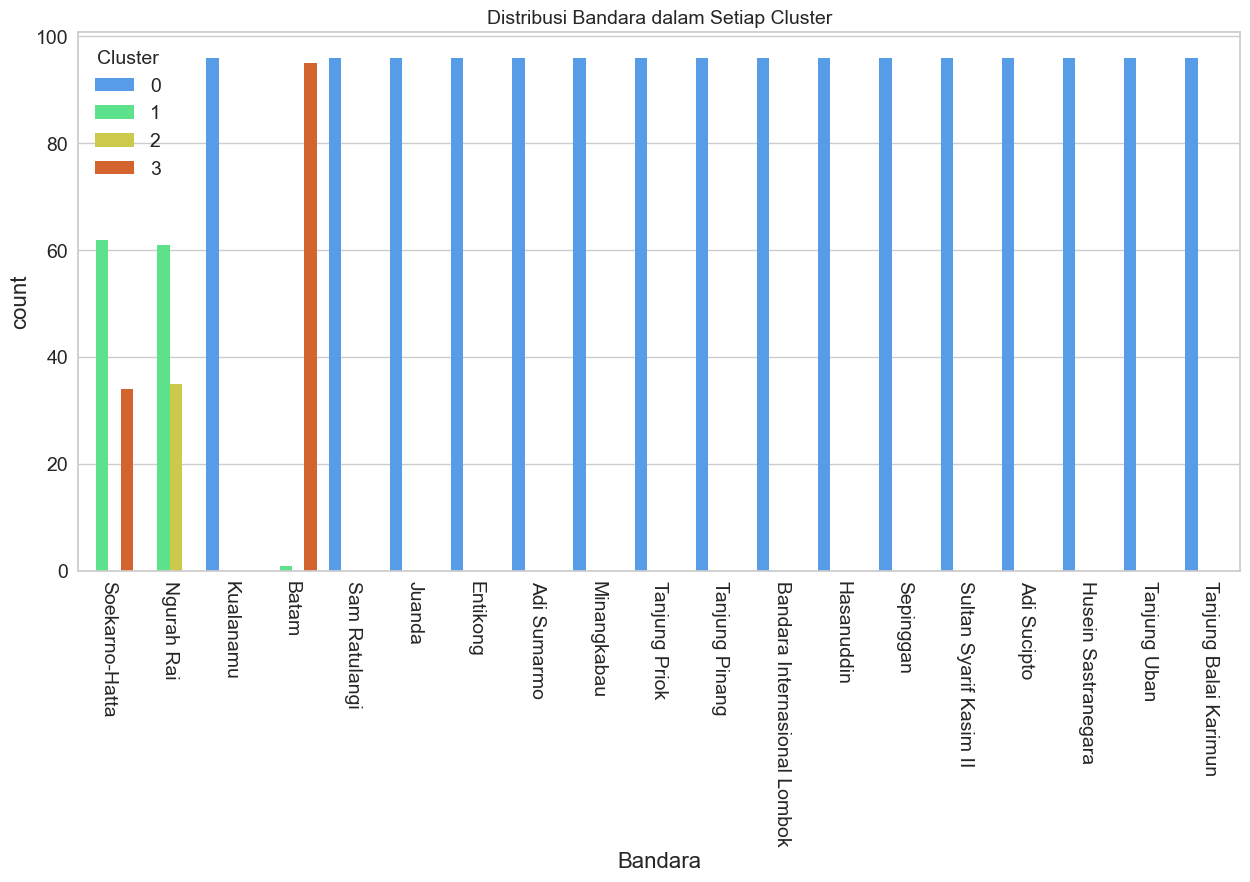

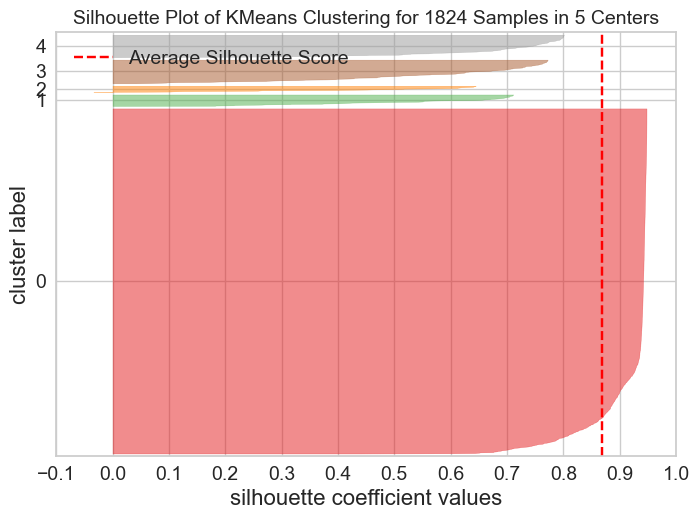

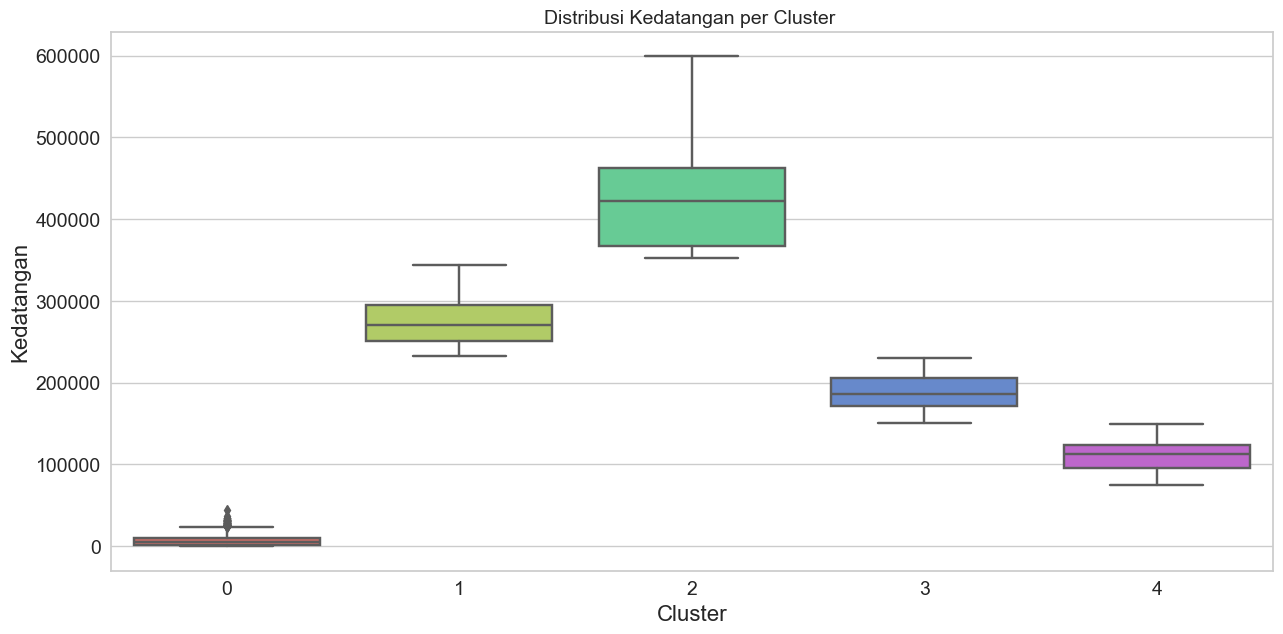

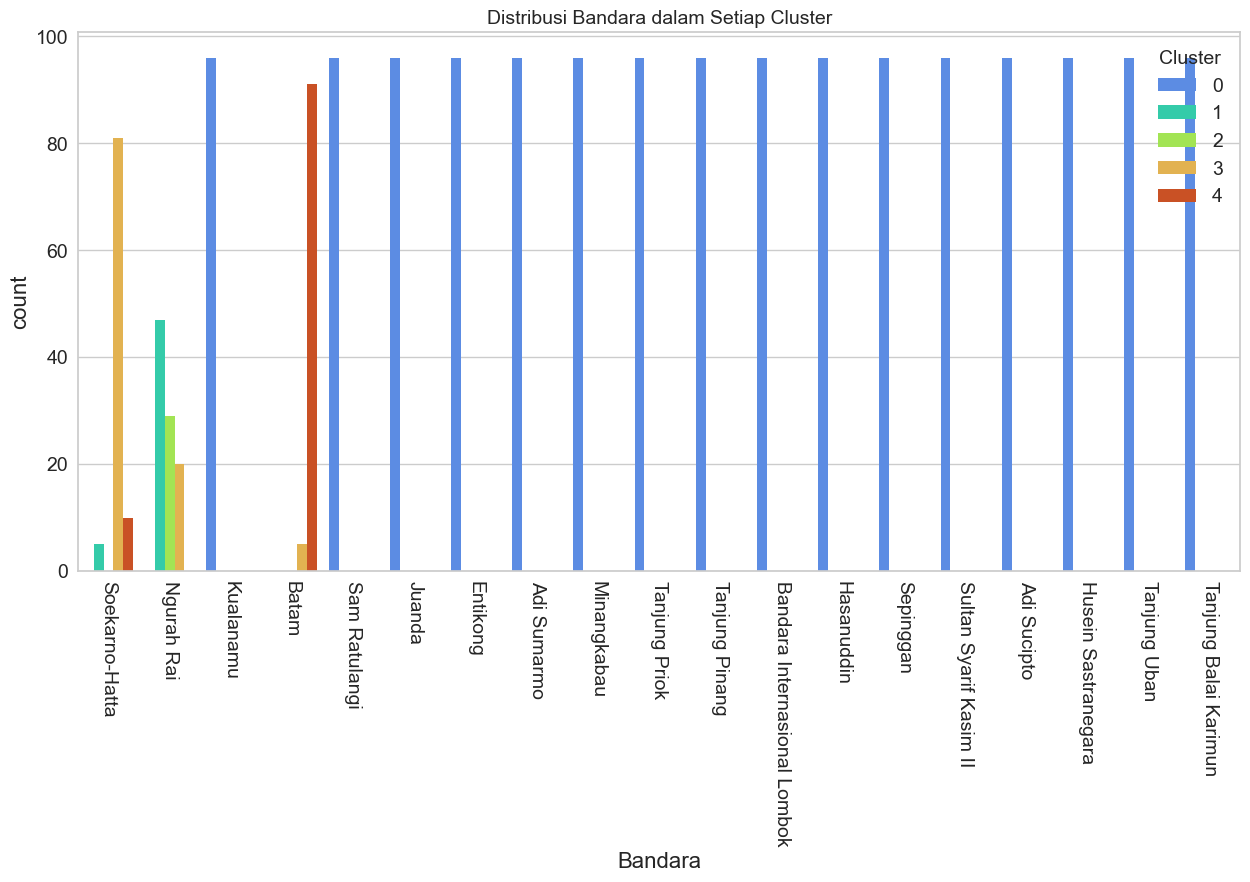

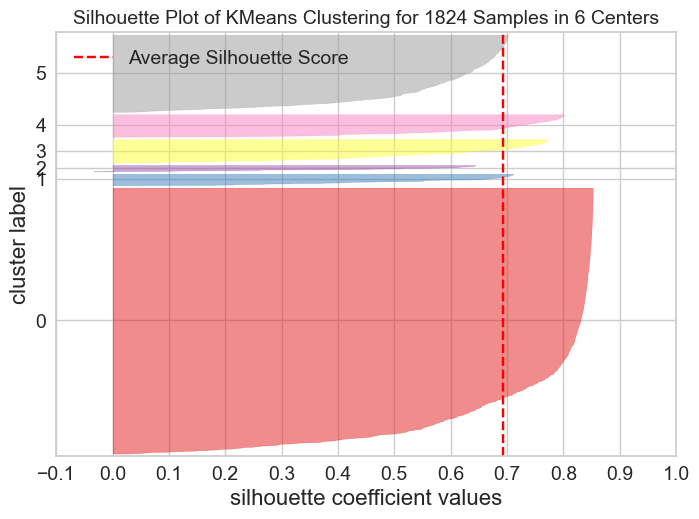

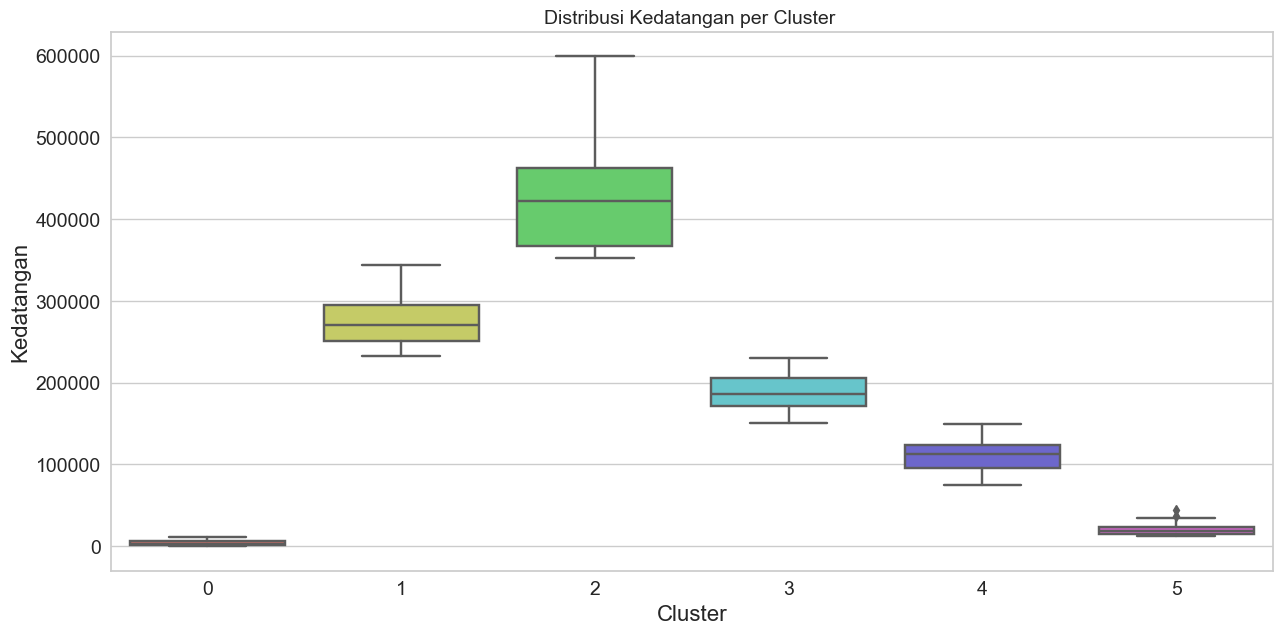

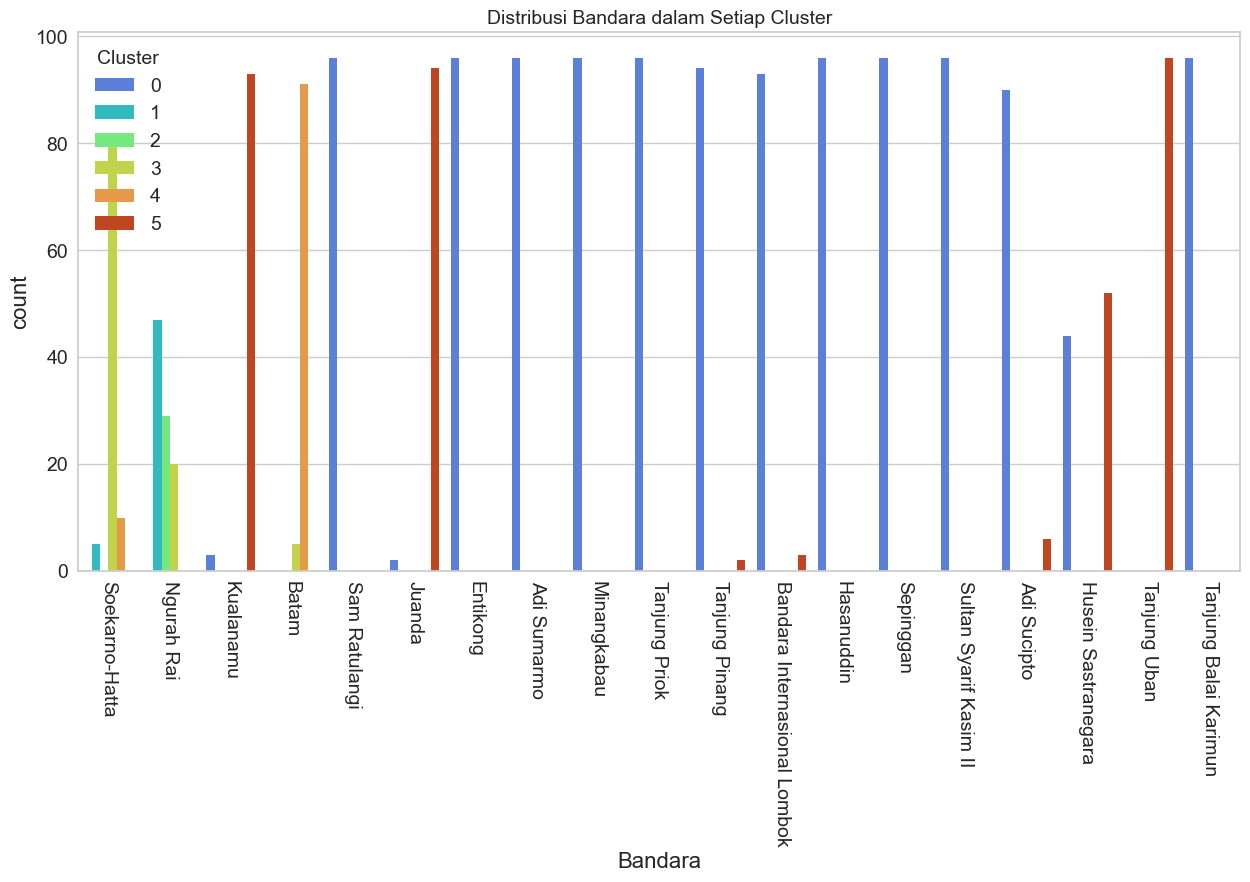

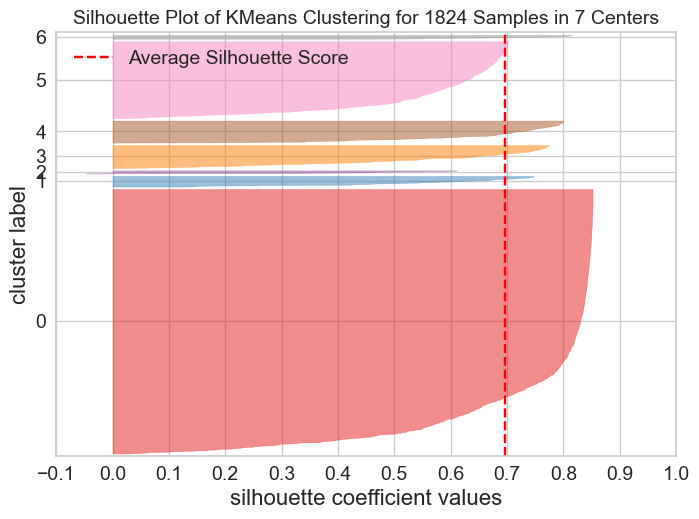

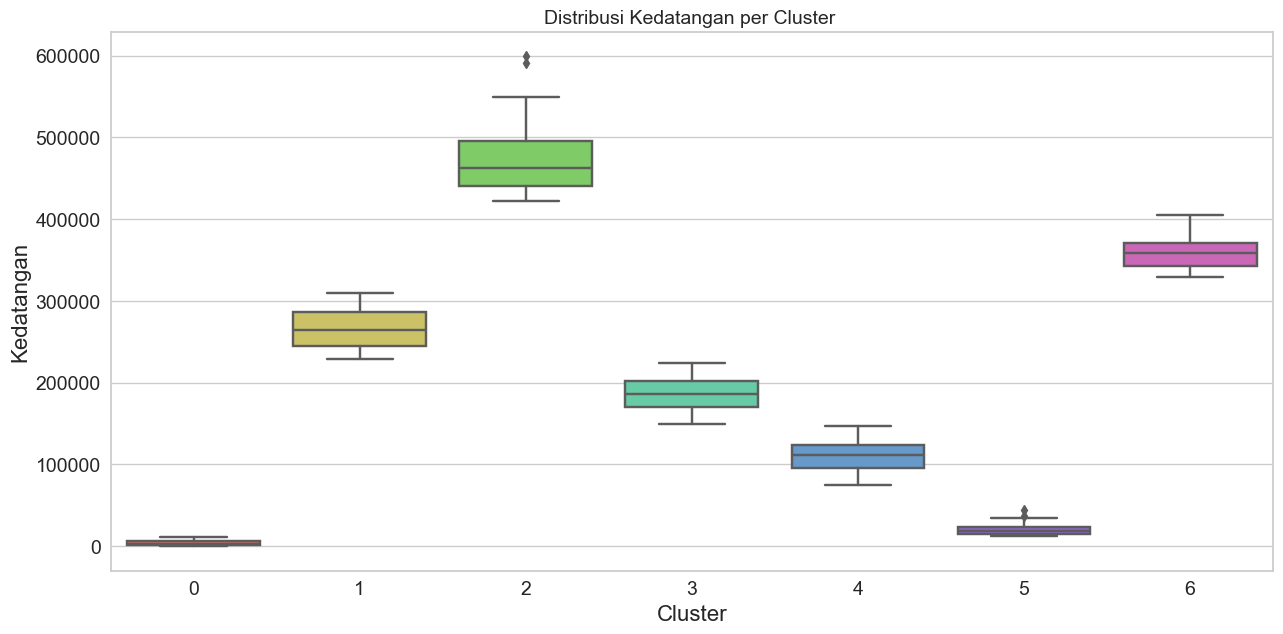

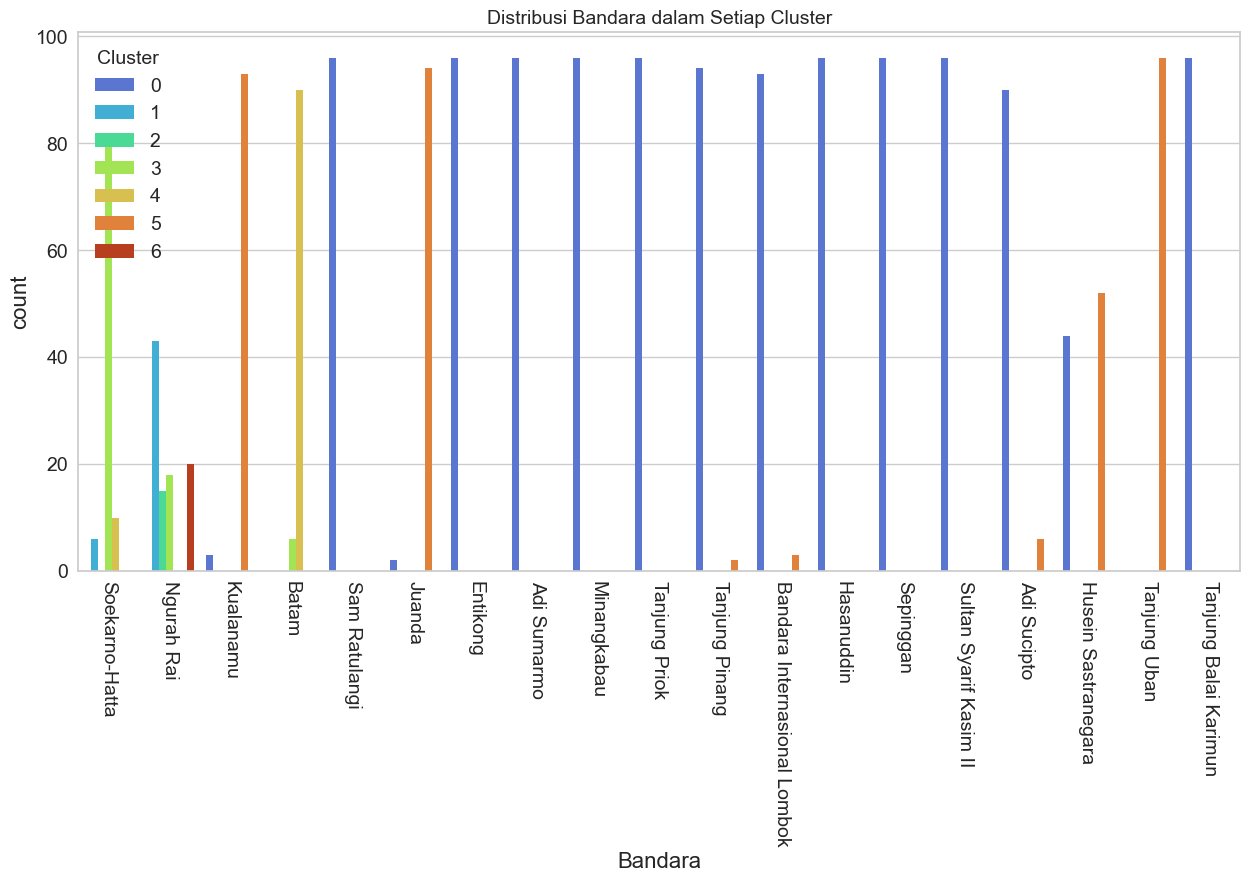

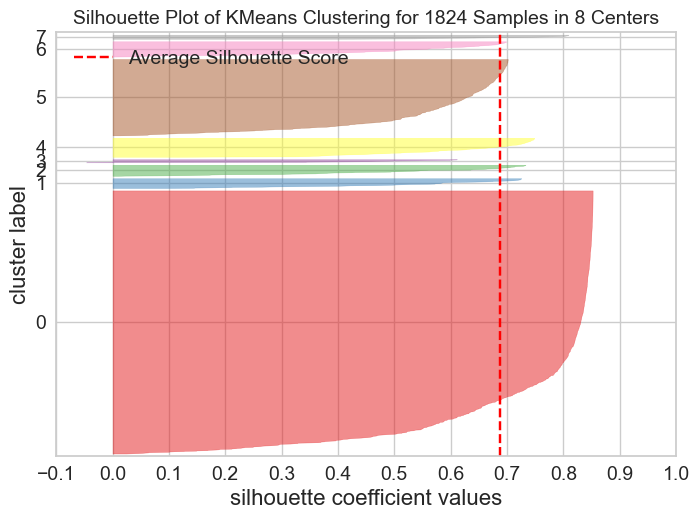

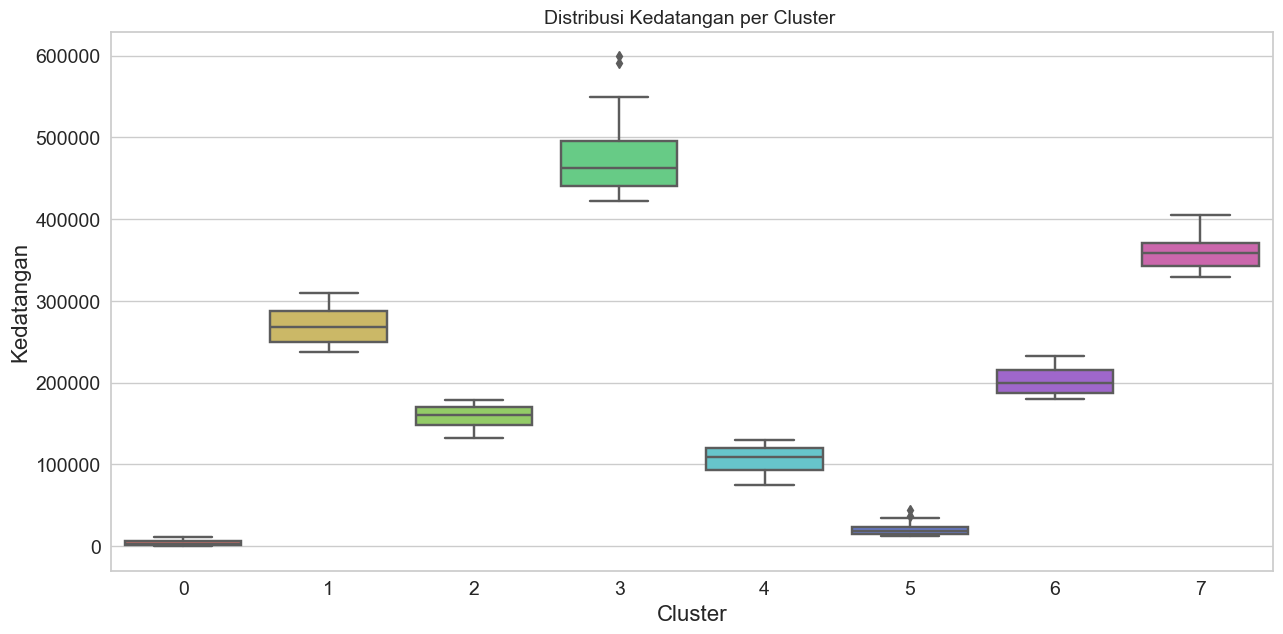

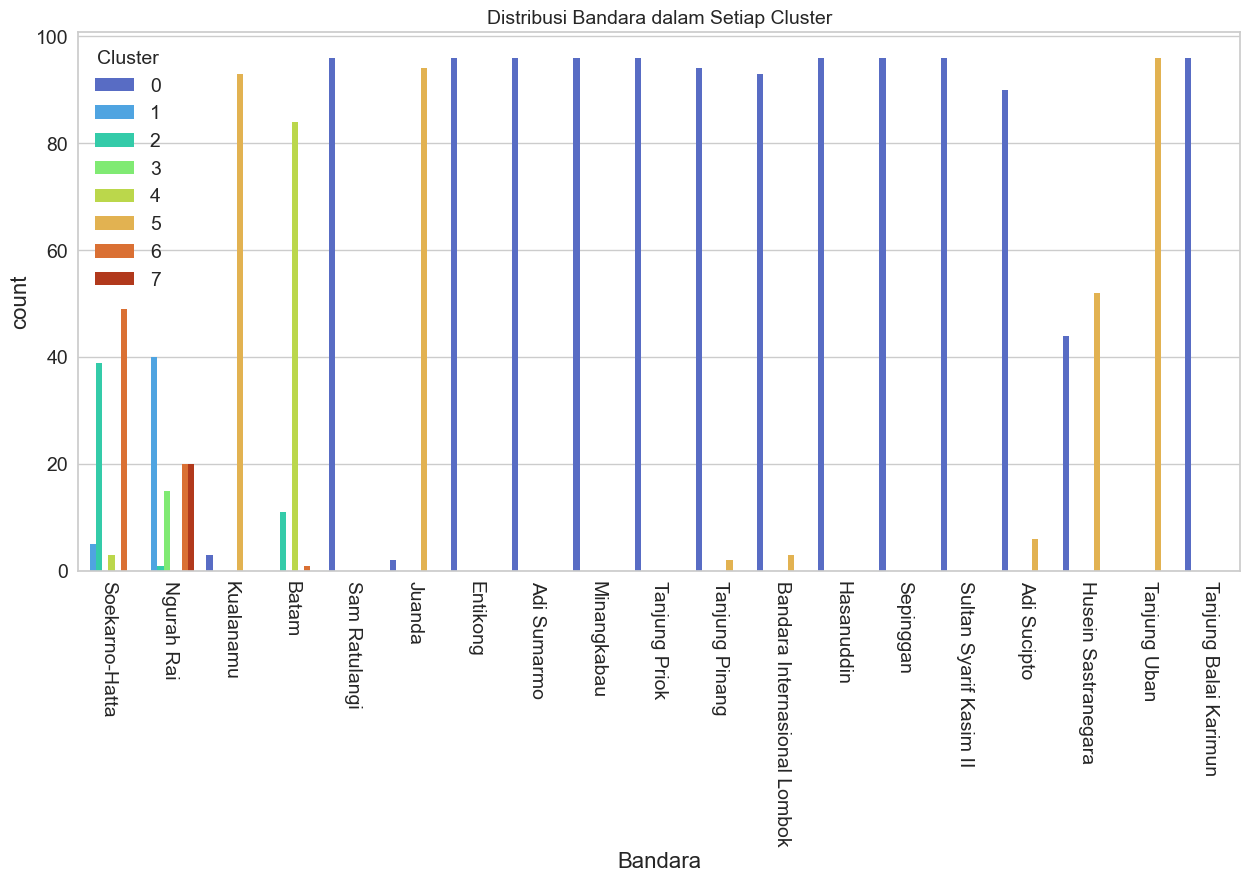

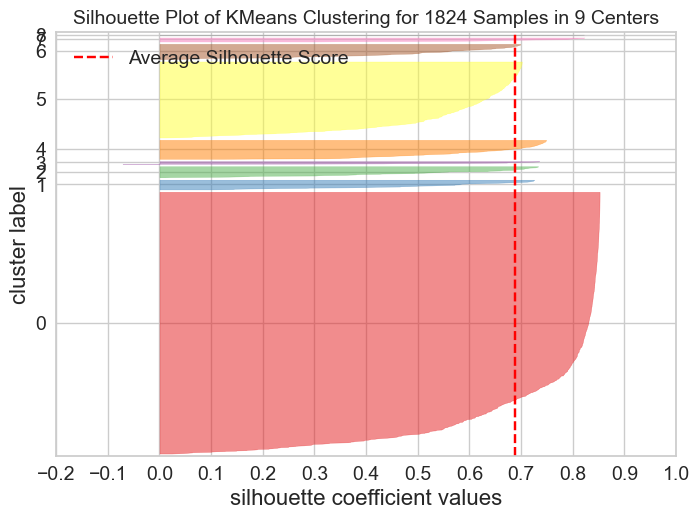

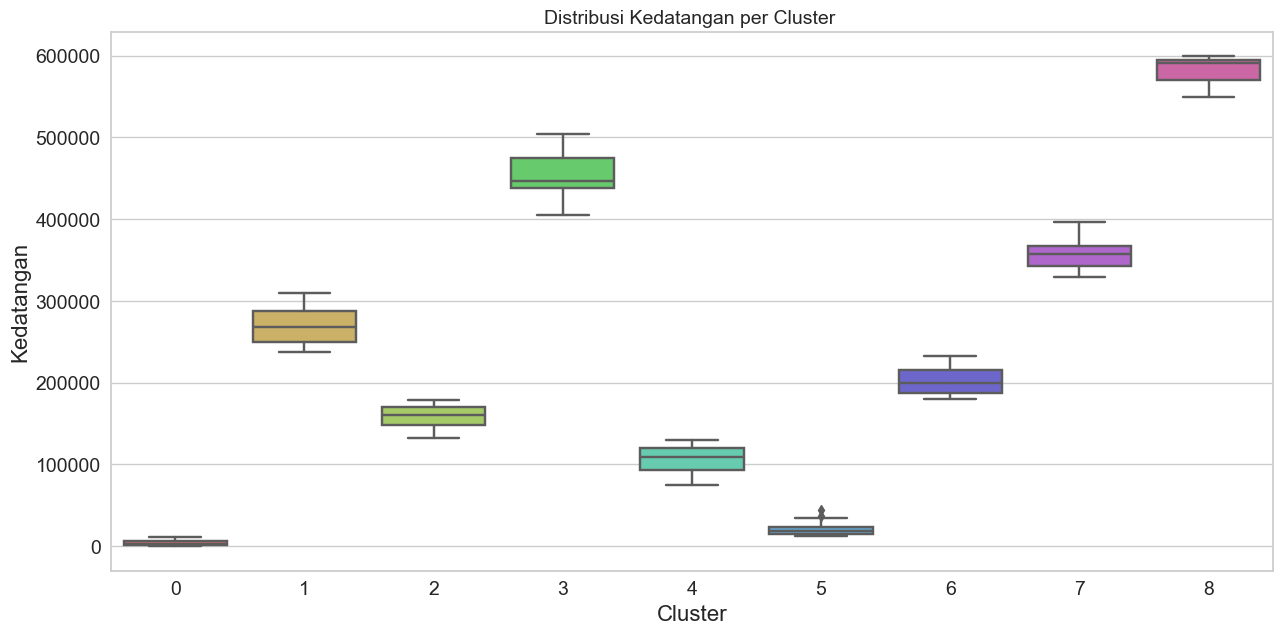

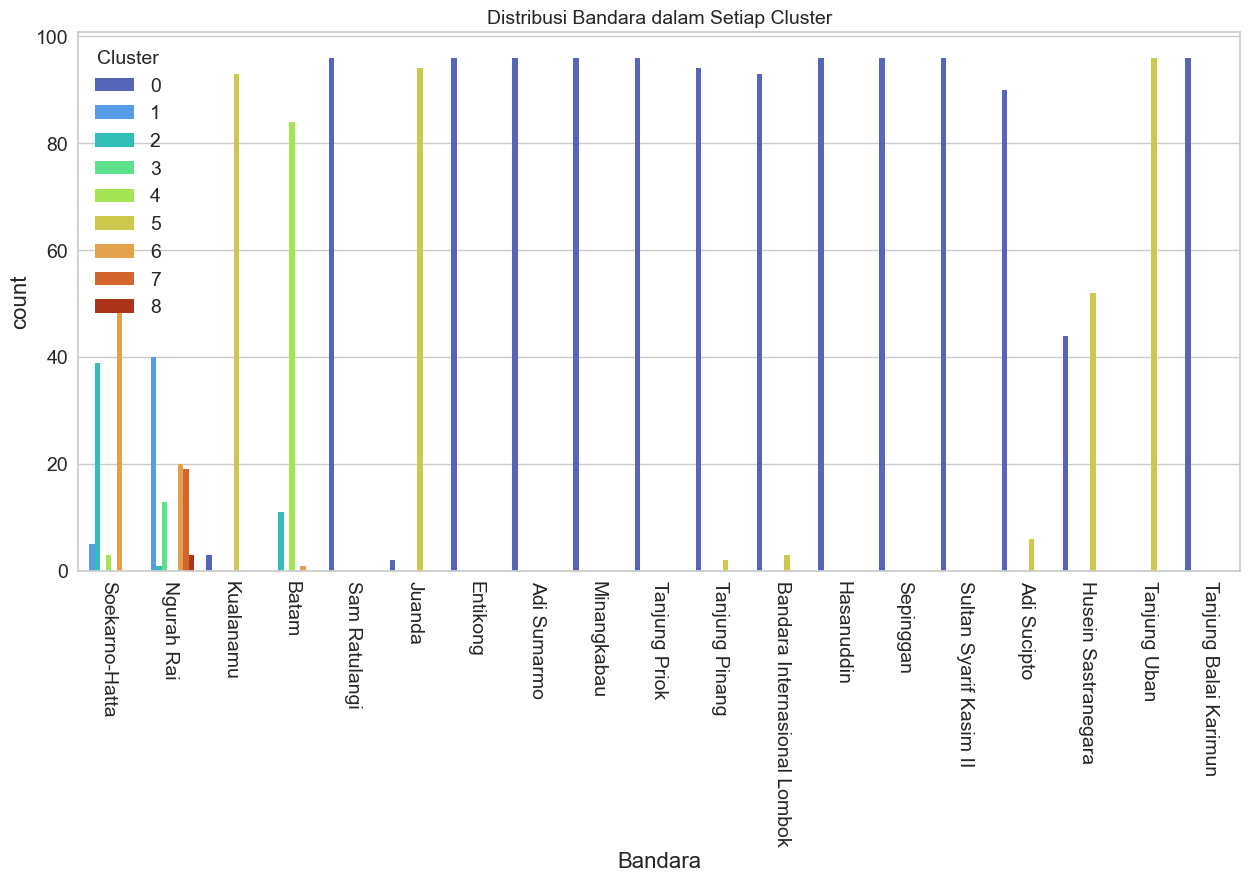

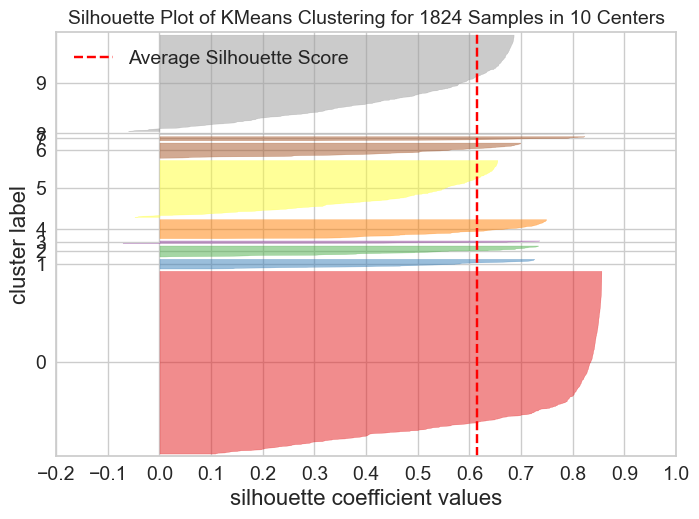

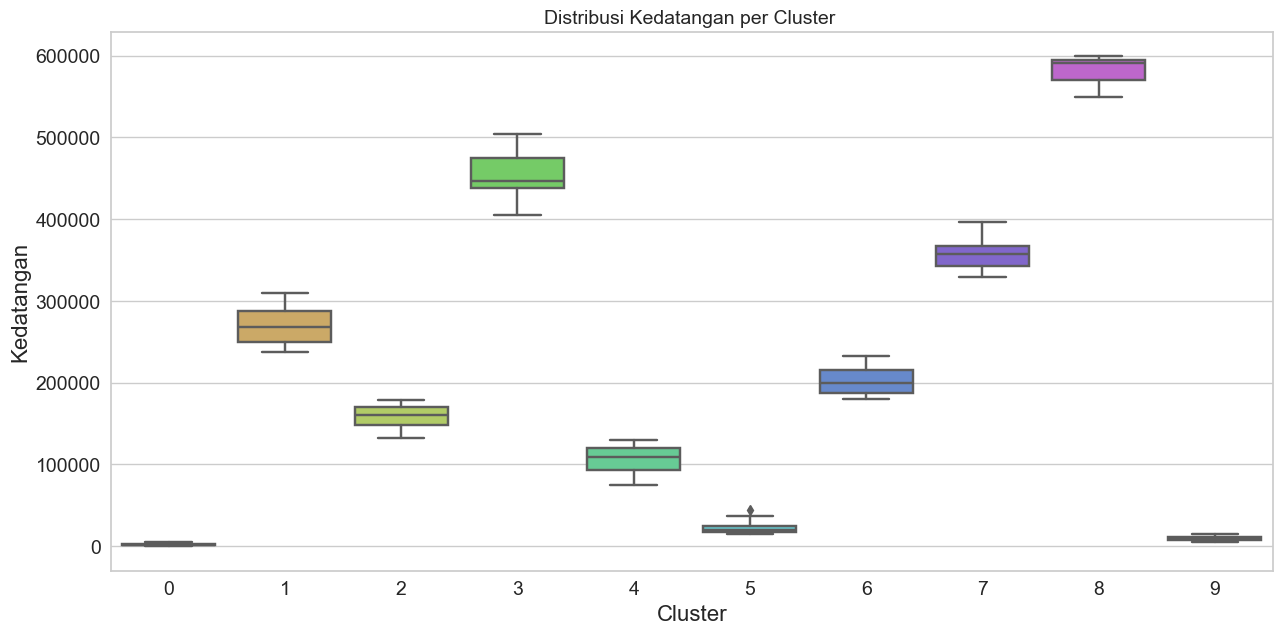

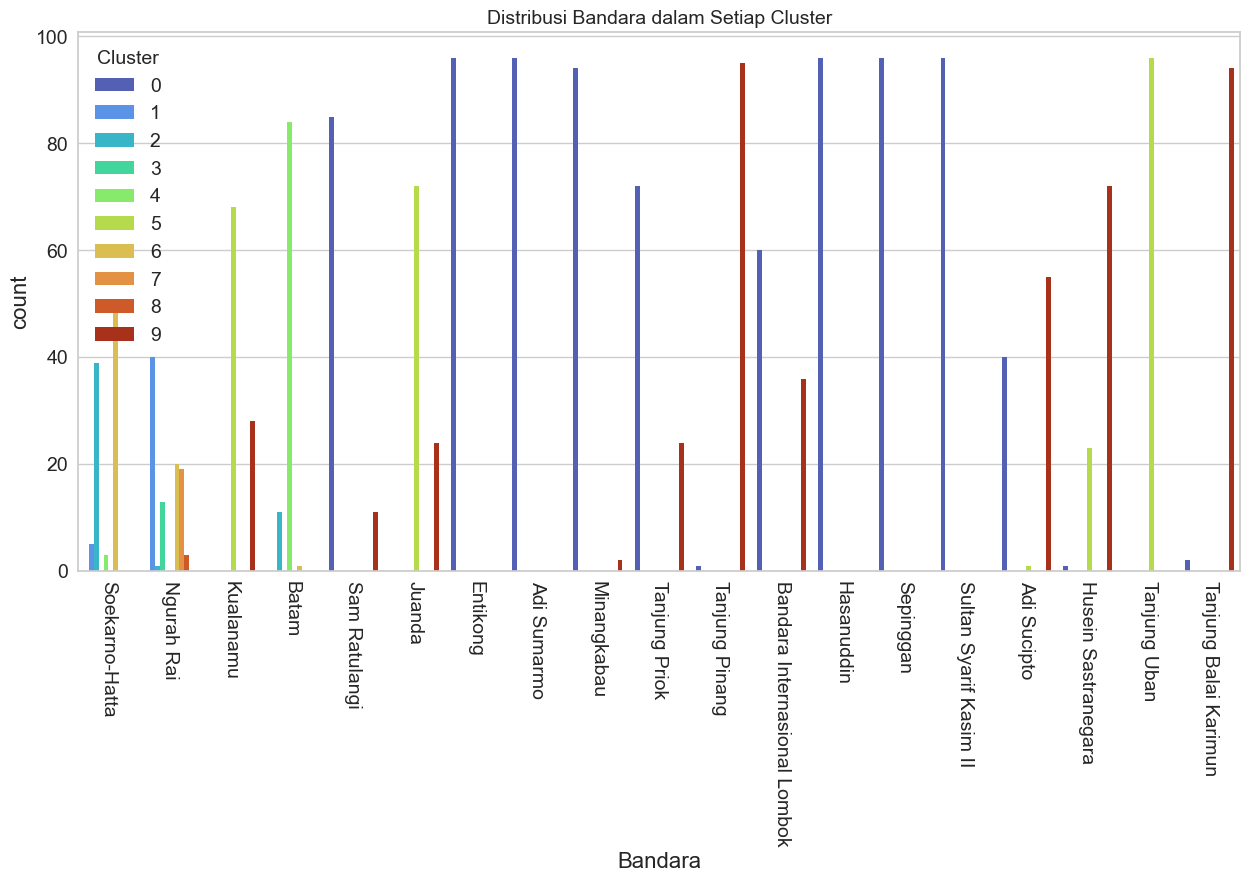

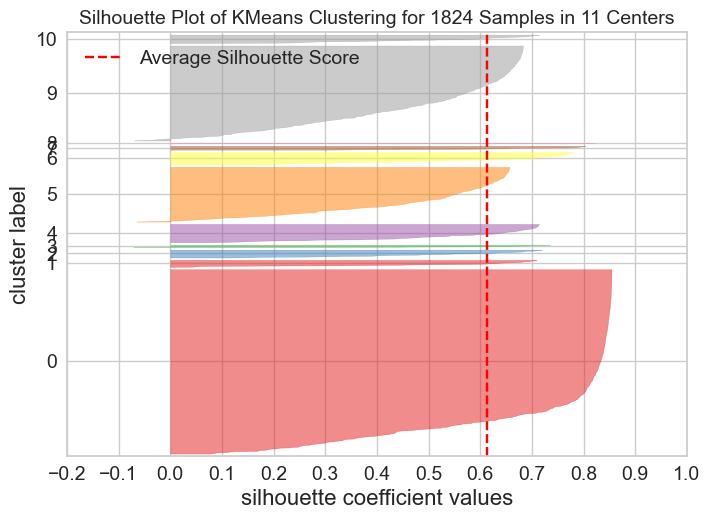

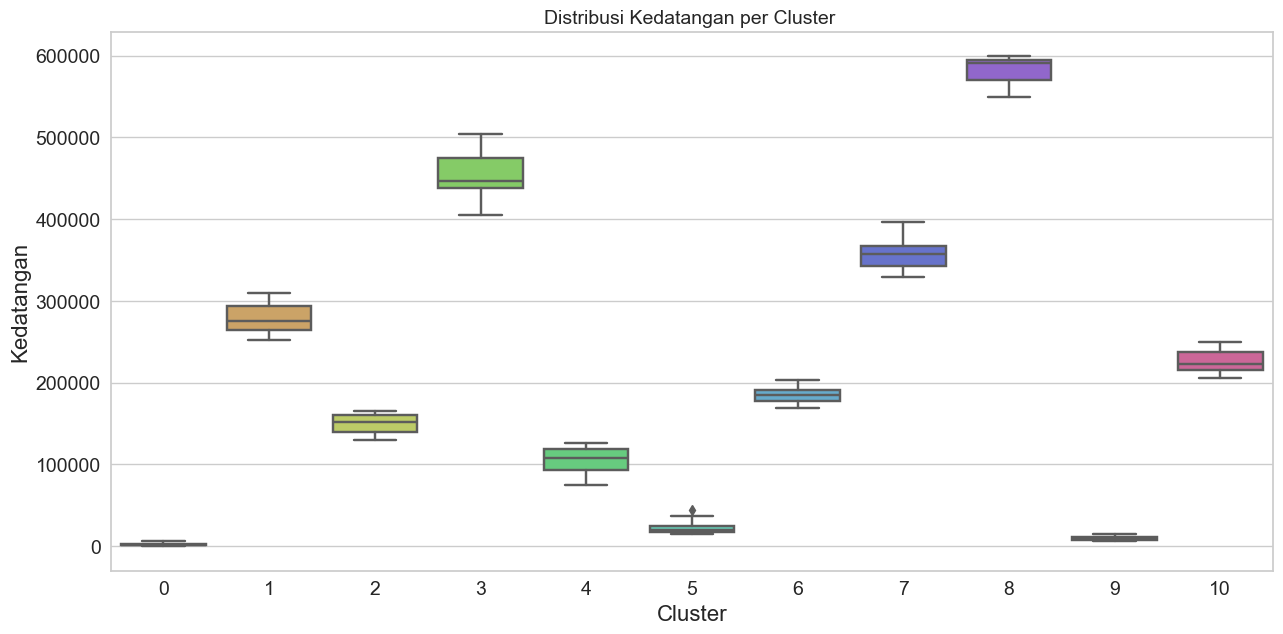

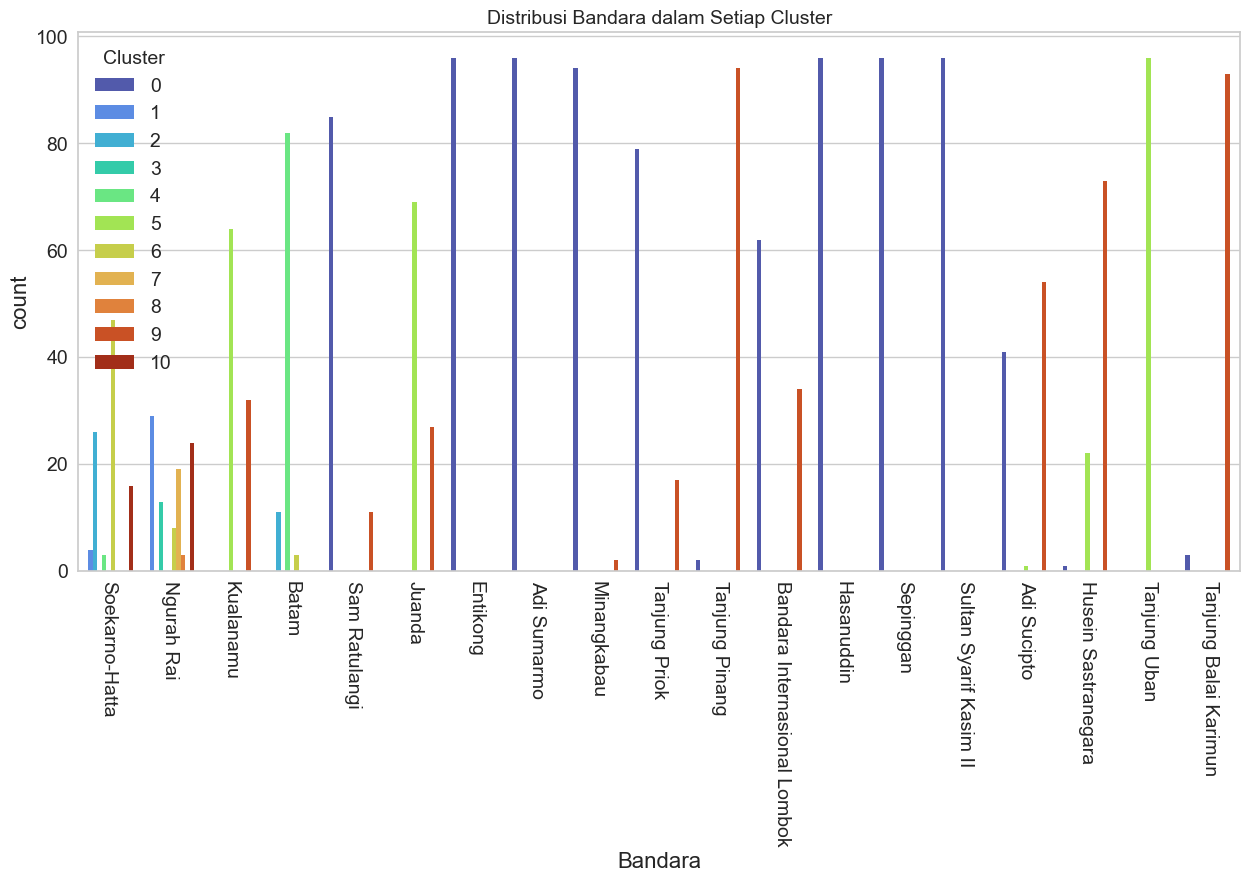

Rentang Data Setiap Cluster
Jumlah Cluster --> 2
Cluster 0: dari 0 - 126.771
Cluster 1: dari 129.318 - 599.302

Jumlah Cluster --> 3
Cluster 1: dari 86.318 - 255.717
Cluster 0: dari 0 - 85.307
Cluster 2: dari 262.180 - 599.302

Jumlah Cluster --> 4
Cluster 3: dari 74.511 - 171.907
Cluster 1: dari 173.906 - 309.888
Cluster 0: dari 0 - 44.525
Cluster 2: dari 329.654 - 599.302

Jumlah Cluster --> 5
Cluster 4: dari 74.511 - 148.920
Cluster 3: dari 150.407 - 229.964
Cluster 1: dari 232.516 - 343.663
Cluster 0: dari 0 - 44.525
Cluster 2: dari 352.017 - 599.302

Jumlah Cluster --> 6
Cluster 4: dari 74.511 - 148.920
Cluster 3: dari 150.407 - 229.964
Cluster 1: dari 232.516 - 343.663
Cluster 0: dari 0 - 11.806
Cluster 5: dari 11.966 - 44.525
Cluster 2: dari 352.017 - 599.302

Jumlah Cluster --> 7
Cluster 4: dari 74.511 - 147.579
Cluster 3: dari 148.920 - 224.695
Cluster 1: dari 229.561 - 309.888
Cluster 0: dari 0 - 11.806
Cluster 5: dari 11.966 - 44.525
Cluster 6: dari 329.654 - 405.686
Cluster

In [43]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
all_cluster_stats = []
score = []

for cluster in n_clusters:
    kmeans_labels, silhouette, davies = kmeans_train(cluster)
    cluster_stats = kmeans_show_plot(kmeans_labels,cluster)
    all_cluster_stats.extend(cluster_stats)

    score.append(f"{cluster} \t\t| {silhouette} \t\t| {davies}")

# Print all the cluster statistics
print('Rentang Data Setiap Cluster')


for stat in all_cluster_stats:
    print(stat)

print('Jumlah Cluster \t| Silhouette Score \t| Davies Index')
for score in score:
    print(score)

## Fuzzy C-Means

In [44]:
def fcm_train(n_cluster):
    X = ddd.to_numpy().copy()
    my_model = FCM(n_clusters=n_cluster, random_state=5)
    my_model.fit(X)
    centers = my_model.centers
    cluster_labels_fcm = my_model.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels_fcm)
    davies_score = davies_bouldin_score(X, cluster_labels_fcm)

    silhouette_round = round(silhouette_avg, 4)
    davies_round = round(davies_score, 4)

    return cluster_labels_fcm, silhouette_round, davies_round

def fcm_show_plot(labels, cluster):
    df_fcm = ddd.copy()
    df_fcm['Cluster'] = labels
    
    df_fcm_object = ds.copy()
    df_fcm_object['Cluster'] = labels

    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18
    
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=SMALL_SIZE)
    plt.rc('ytick', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=BIGGER_SIZE)
    
    # Plot pertama: Boxplot untuk variabel Kedatangan
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='Cluster', y='Kedatangan', data=df_fcm, palette='hls')
    plt.title('Boxplot Variabel Kedatangan')
    plt.show()

    plt.figure(figsize=(15, 7))
    sns.countplot(x='Bandara', hue='Cluster', data=df_fcm_object, palette='turbo')
    plt.xticks(rotation=270)
    plt.title('Distribusi Bandara dalam Setiap Cluster')
    plt.show()

    cluster_stats = []
    cluster_stats.append(f"Jumlah Cluster --> {cluster}")
    for cluster in df_fcm['Cluster'].unique():
        min_value = df_fcm[df_fcm['Cluster'] == cluster]['Kedatangan'].min()
        max_value = df_fcm[df_fcm['Cluster'] == cluster]['Kedatangan'].max()
        min_value_formatted = format(min_value, ',').replace(',', '.')
        max_value_formatted = format(max_value, ',').replace(',', '.')
        cluster_stats.append(f'Cluster {cluster}: dari {min_value_formatted} - {max_value_formatted}')
    cluster_stats.append('')
    return cluster_stats

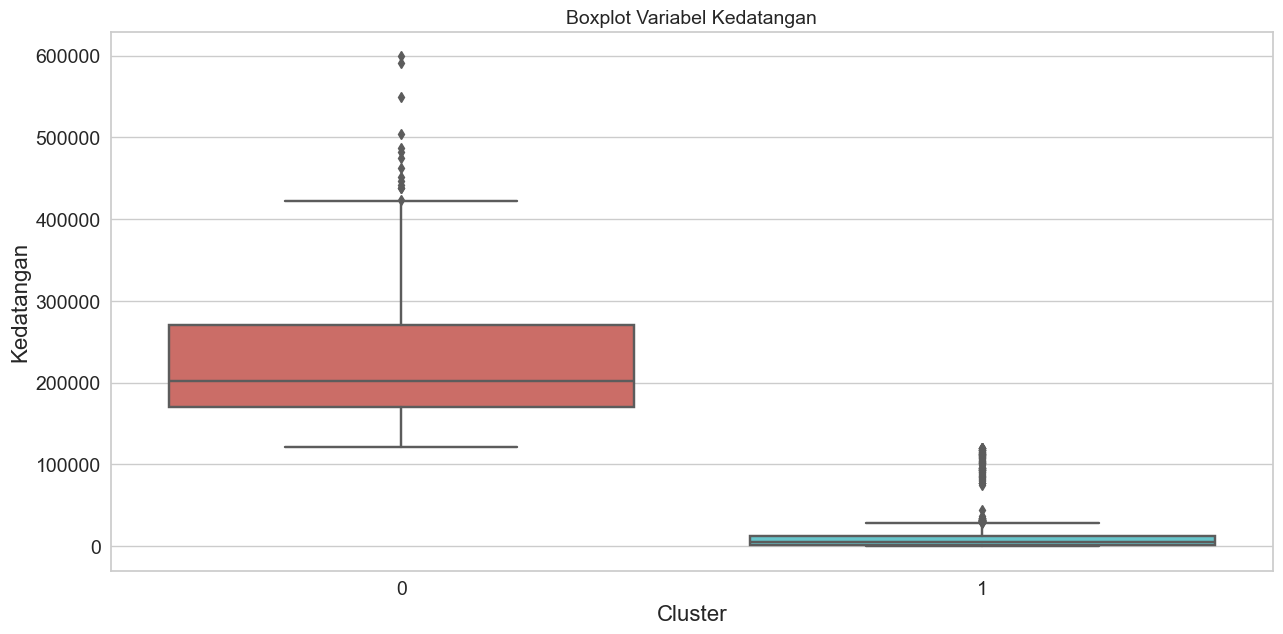

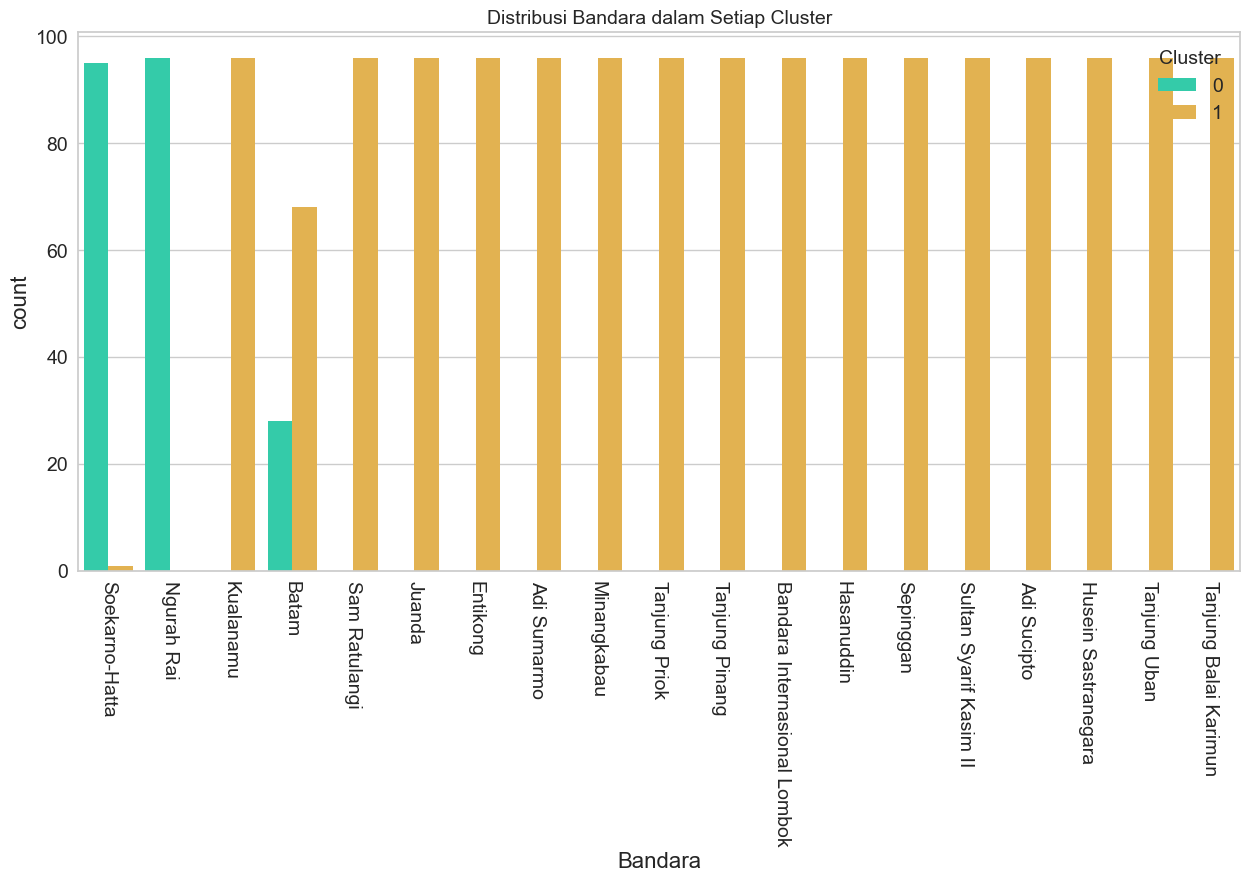

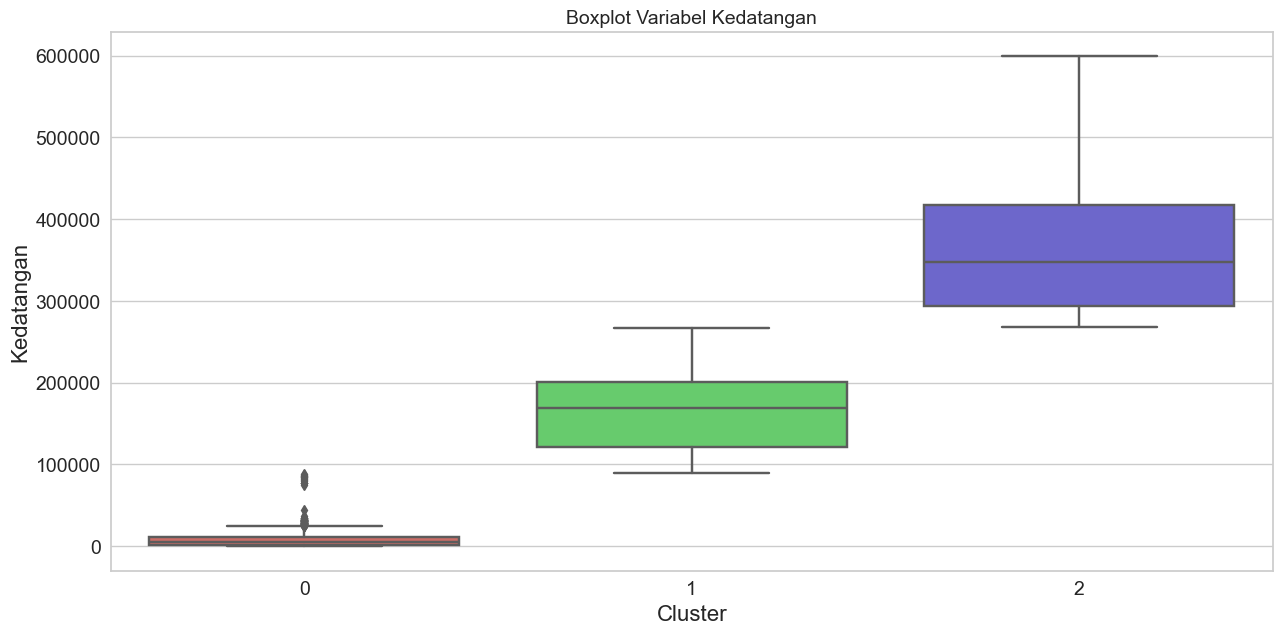

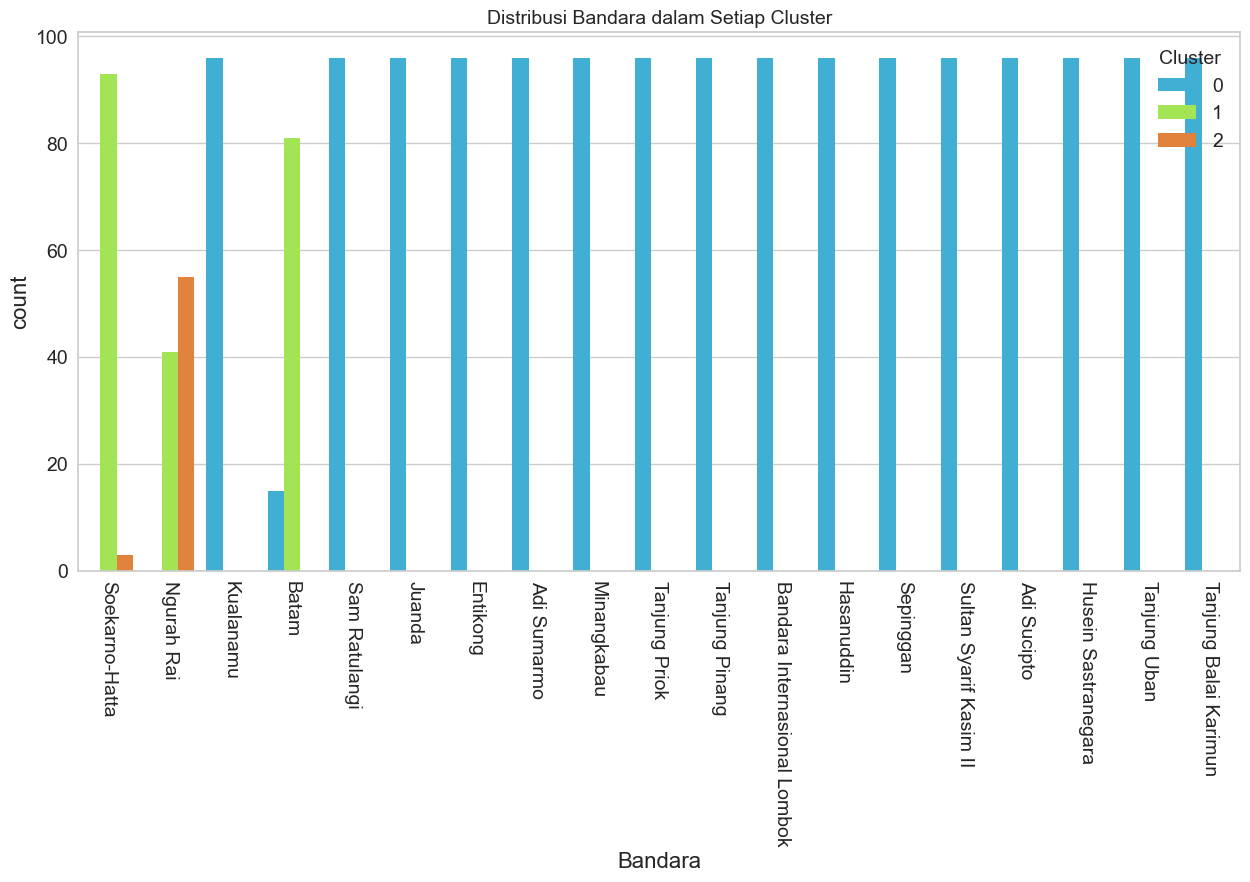

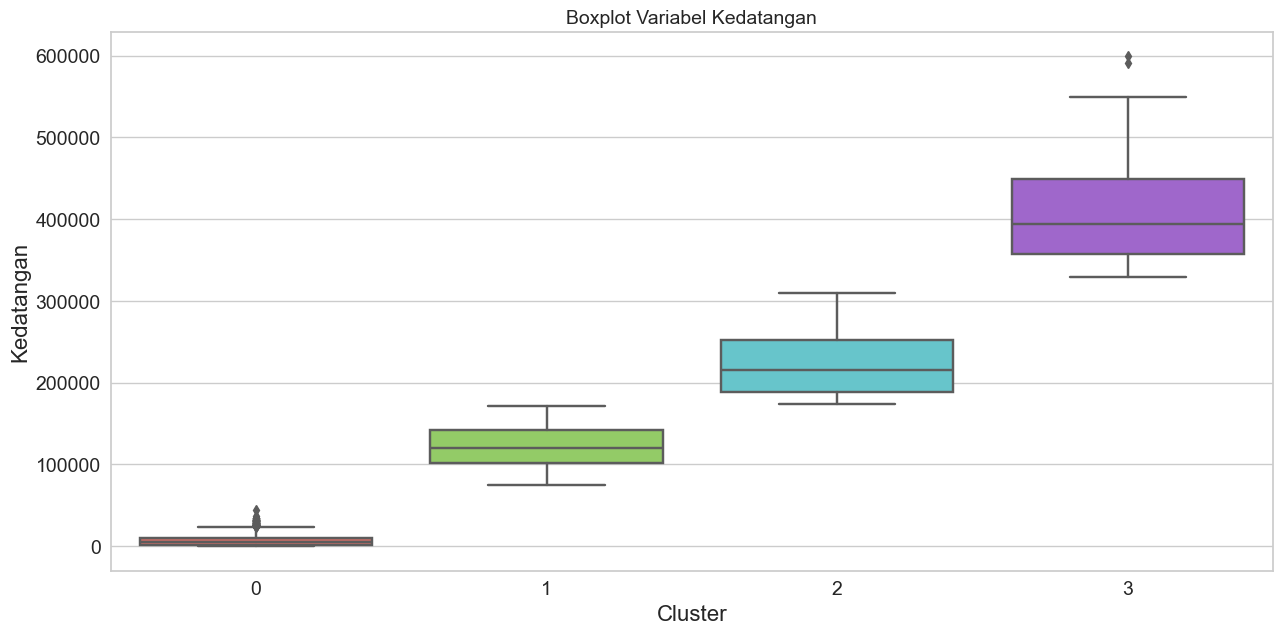

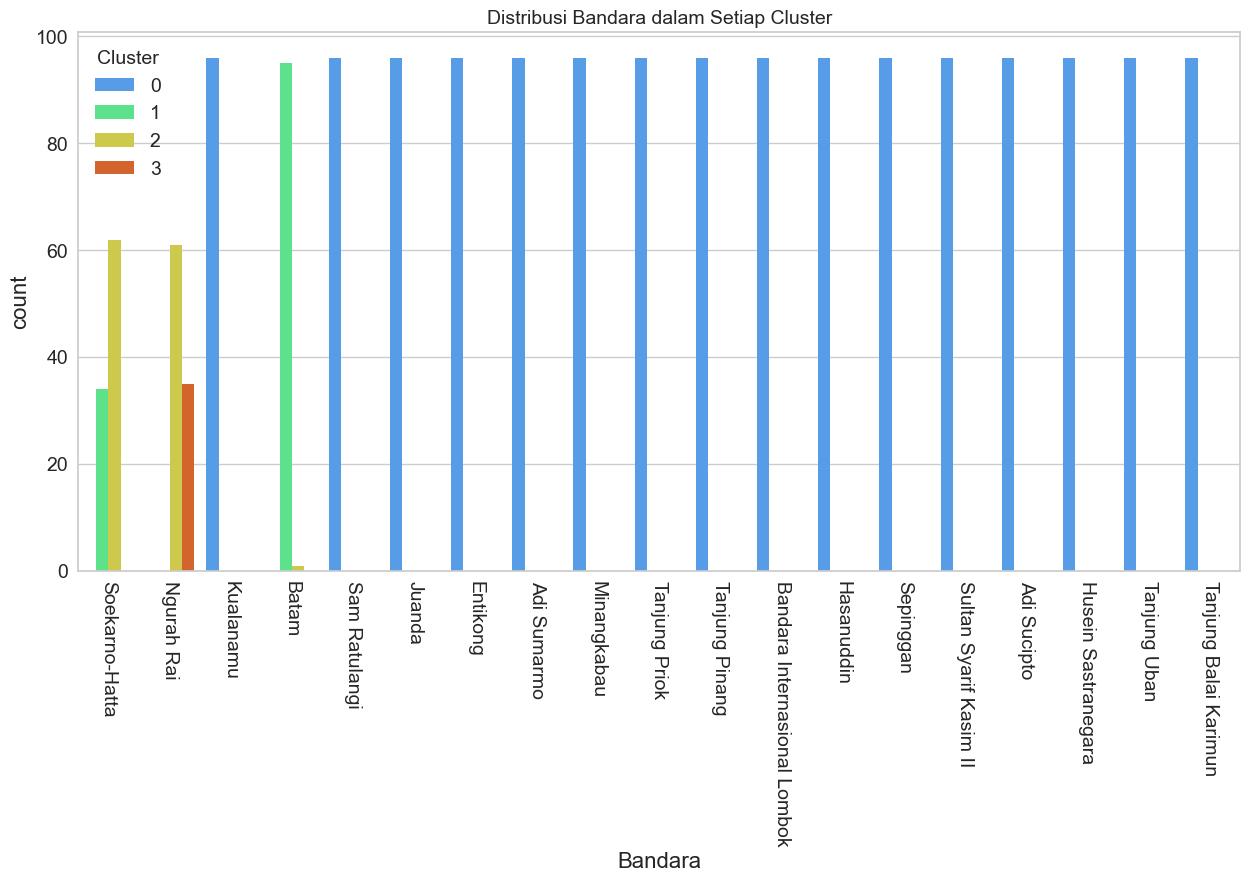

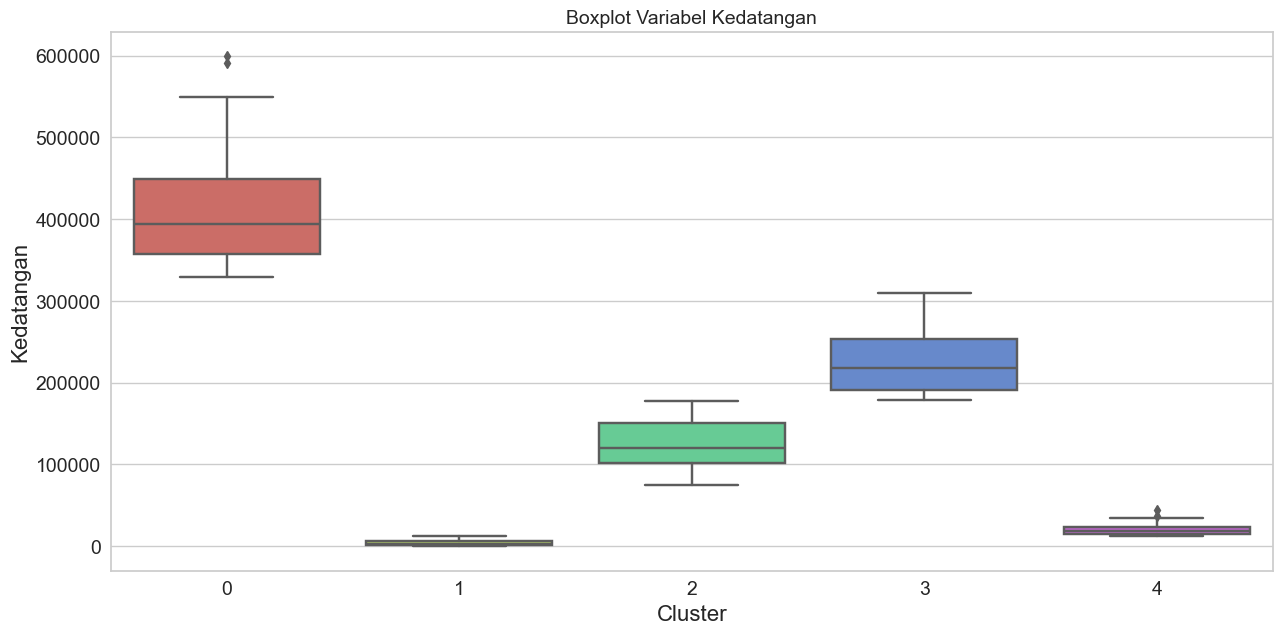

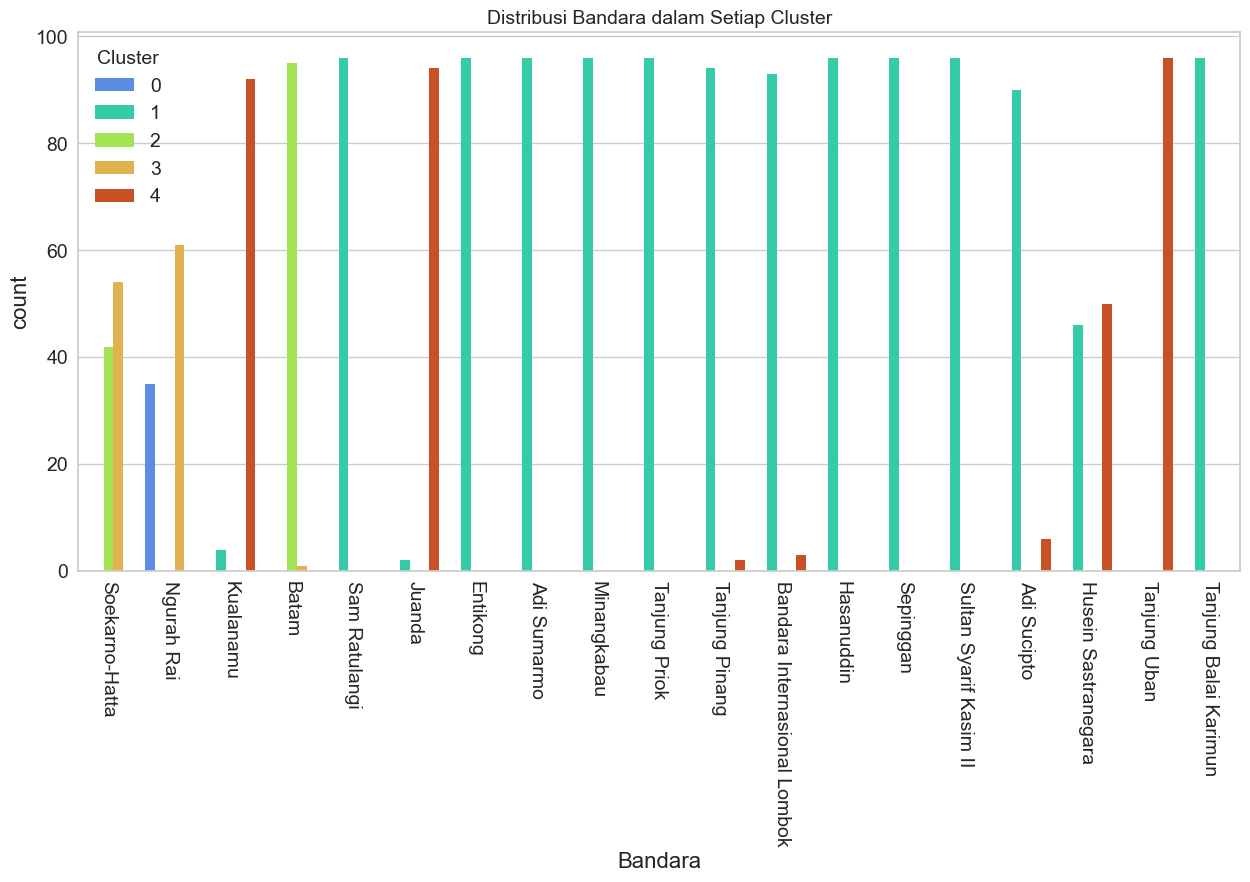

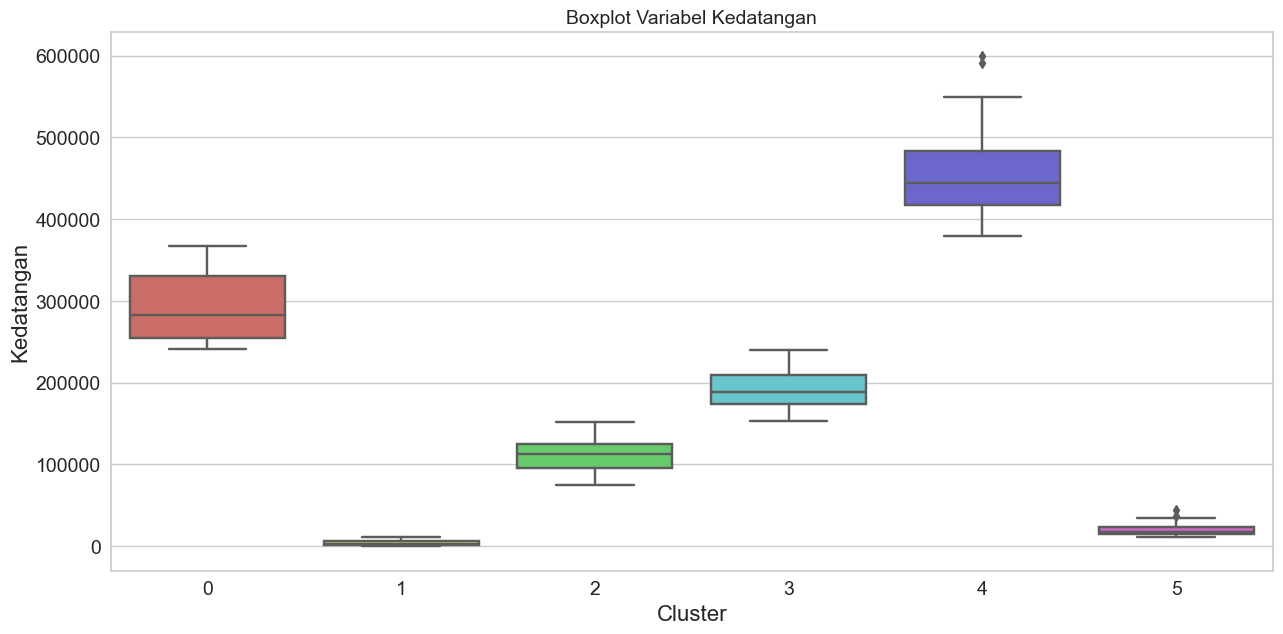

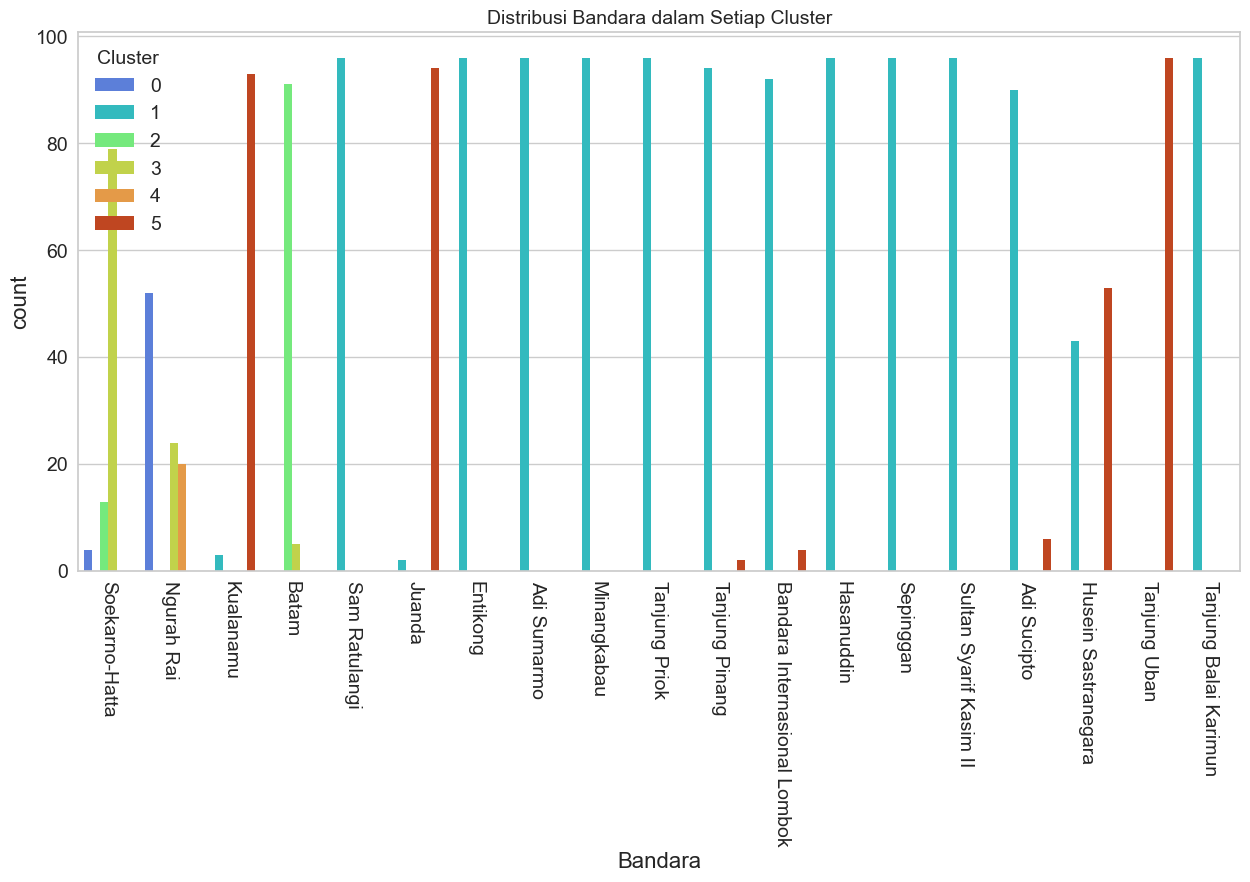

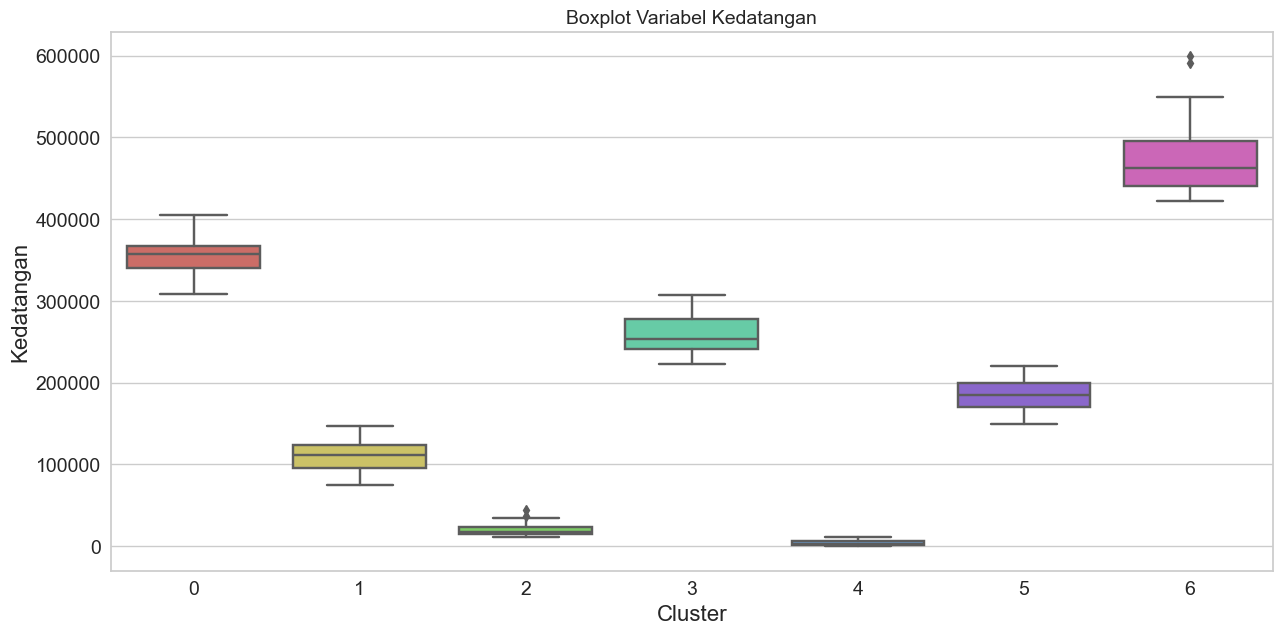

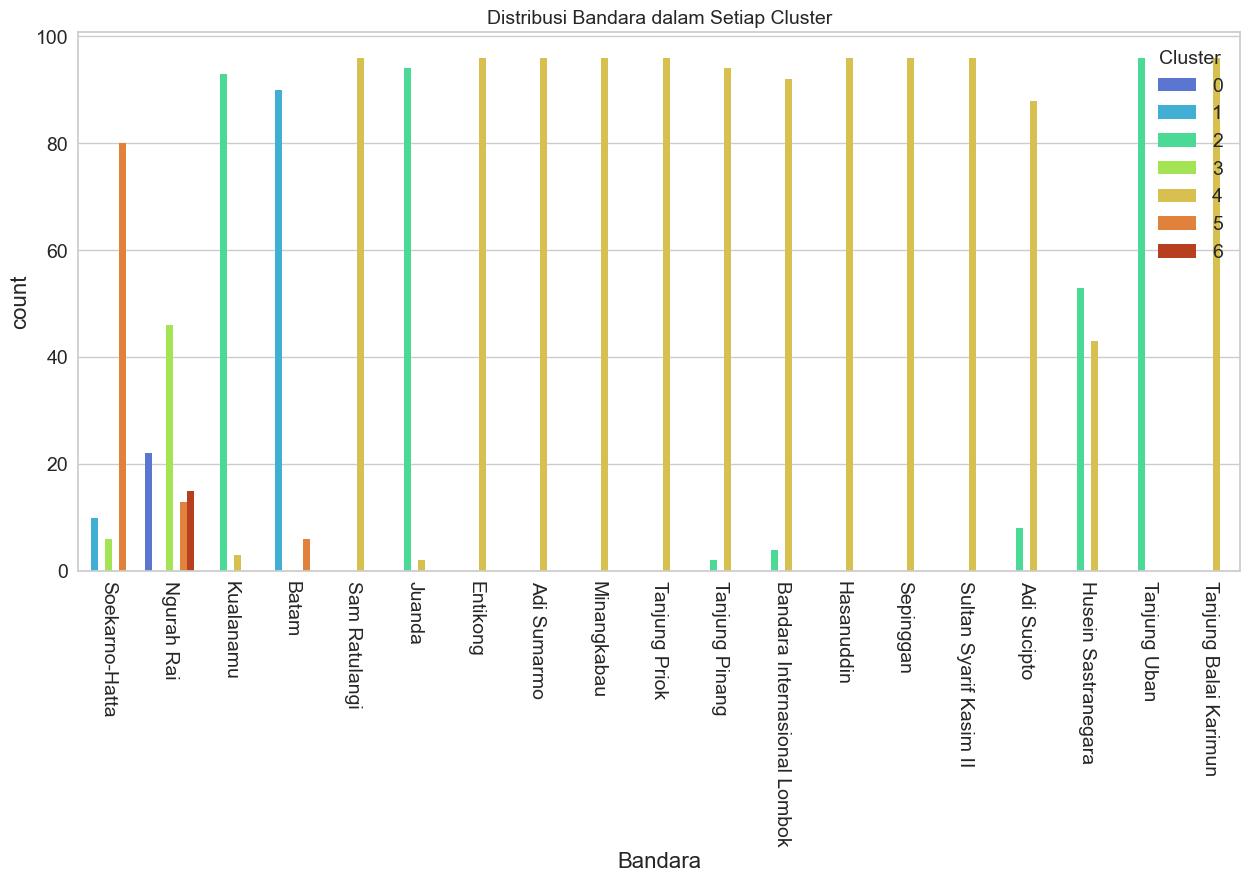

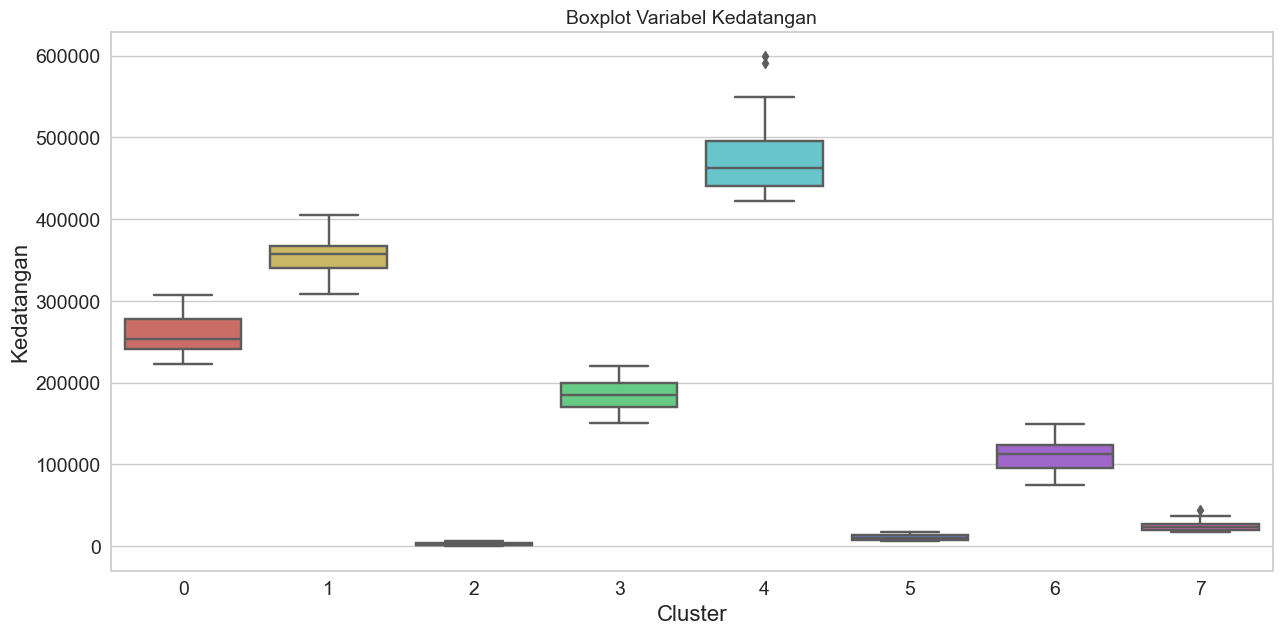

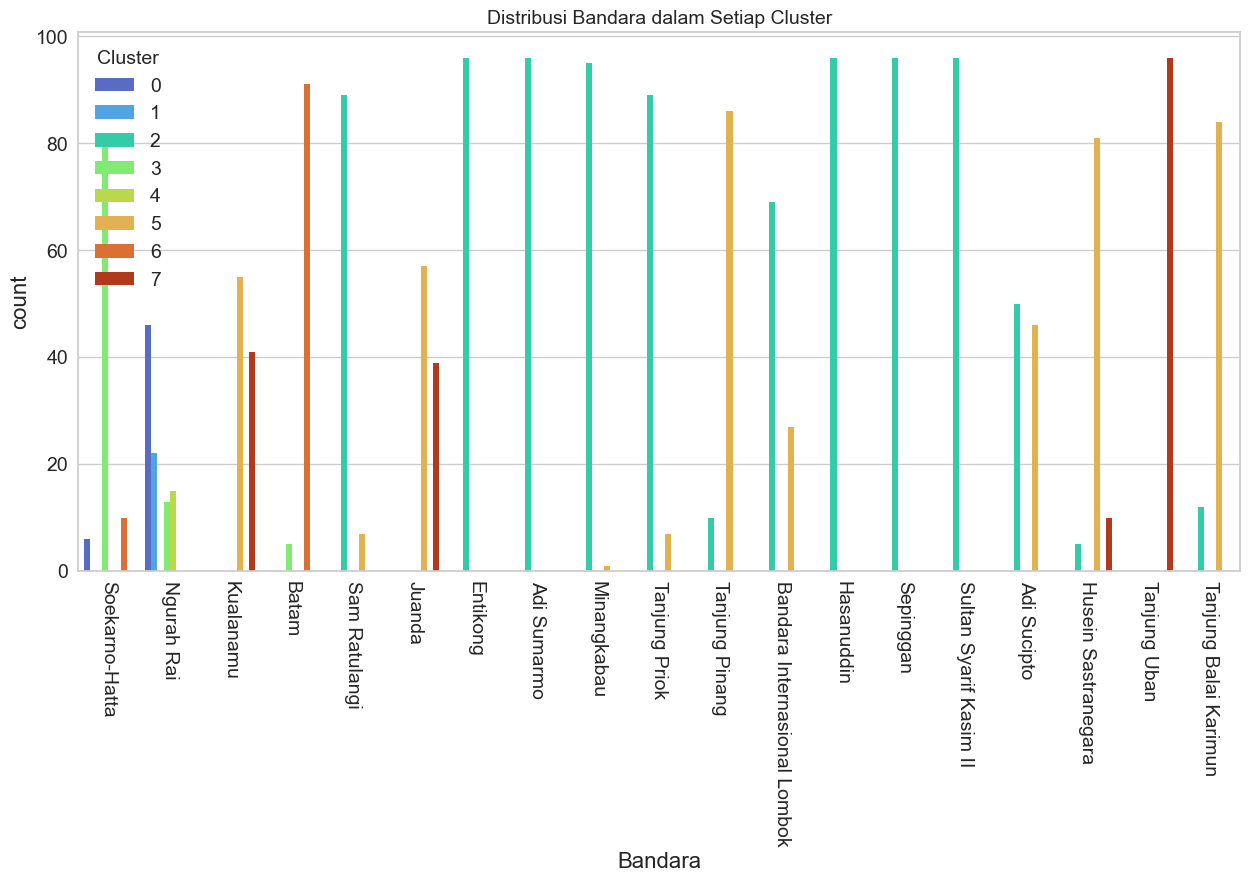

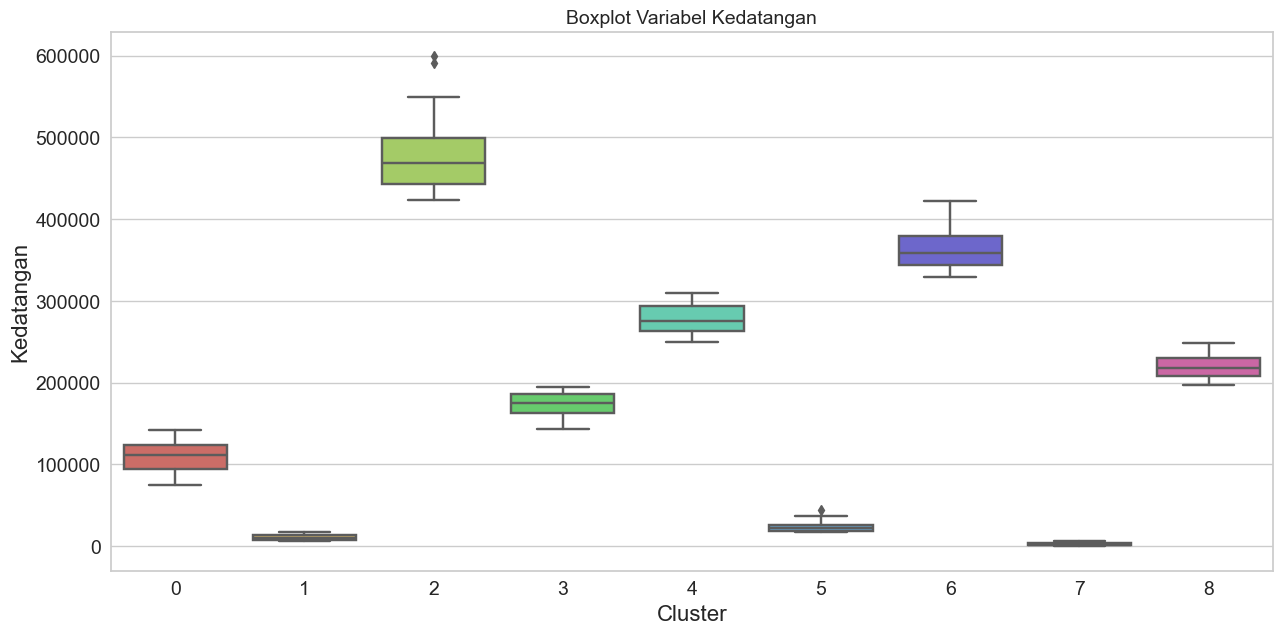

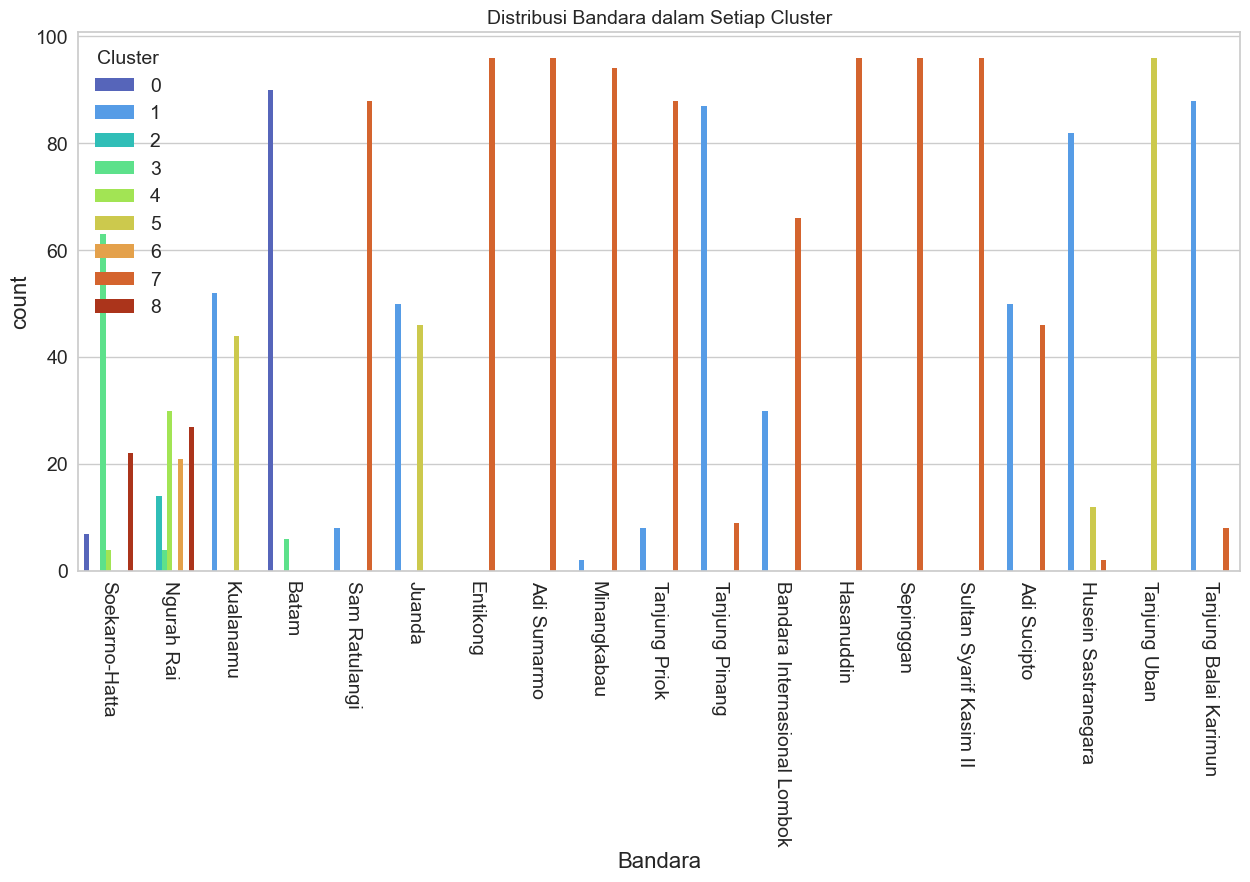

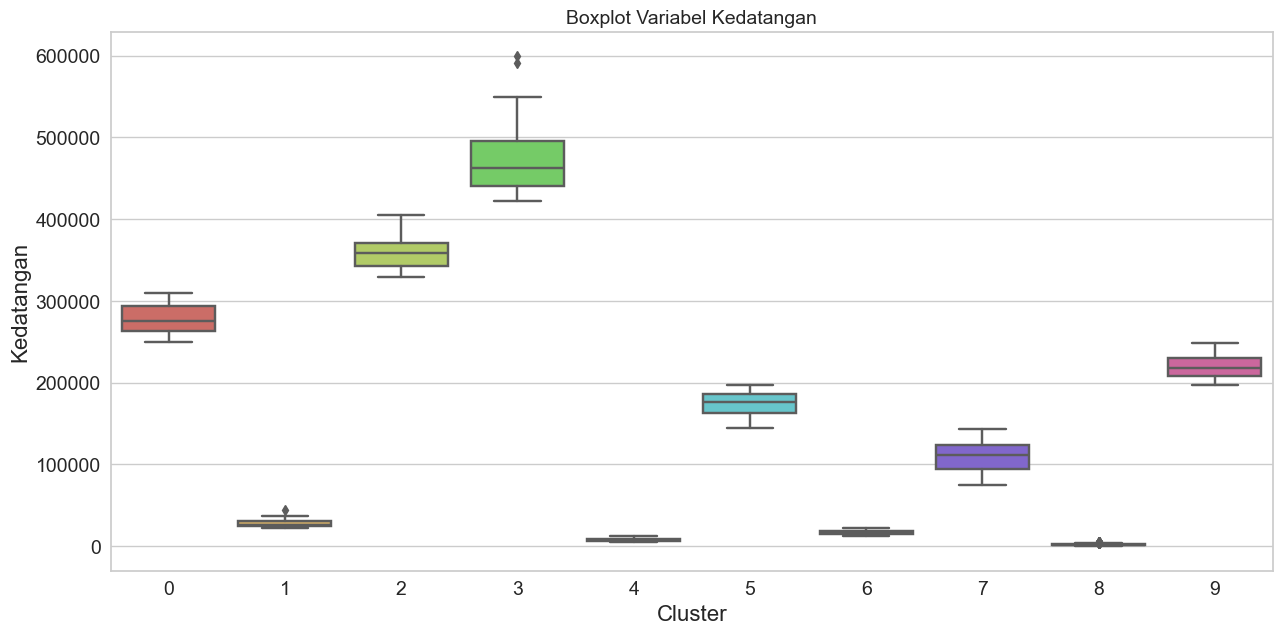

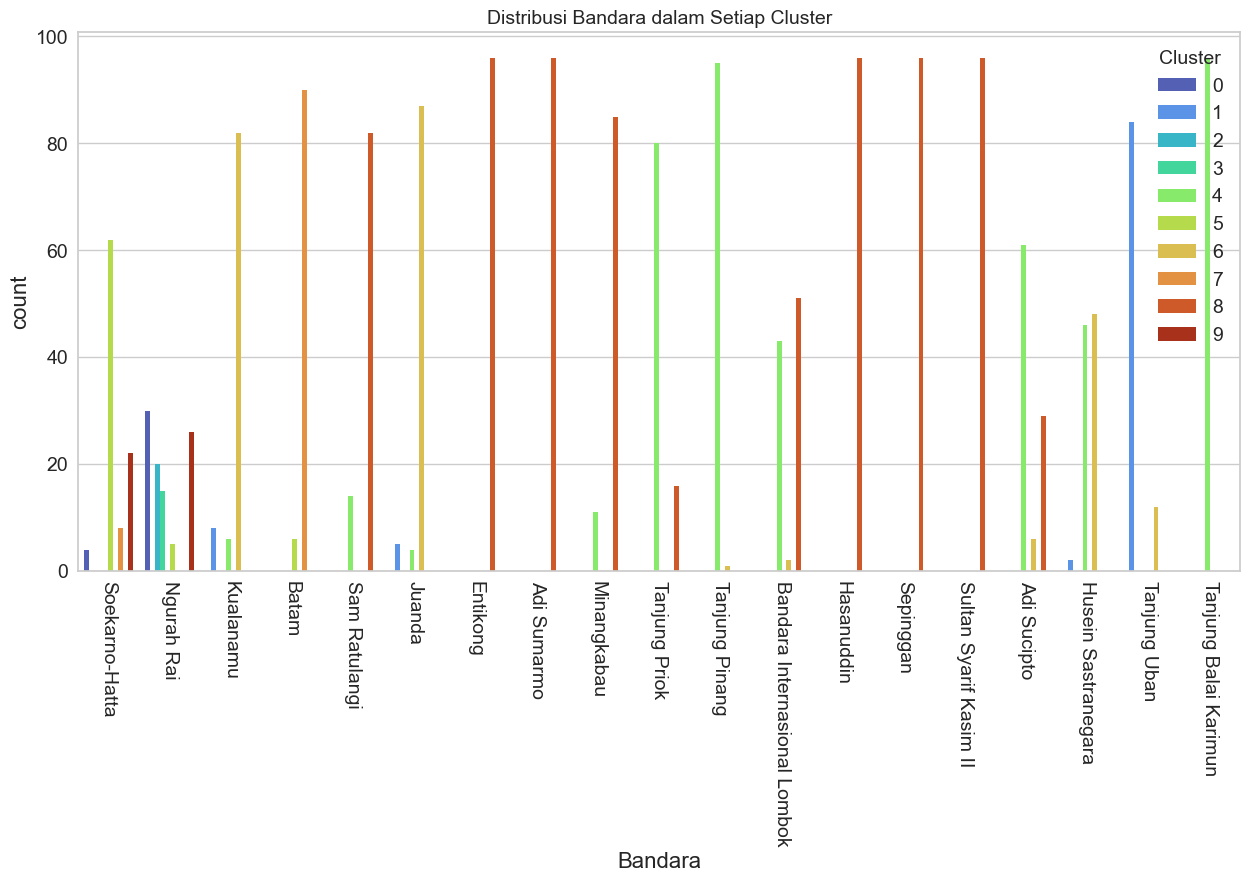

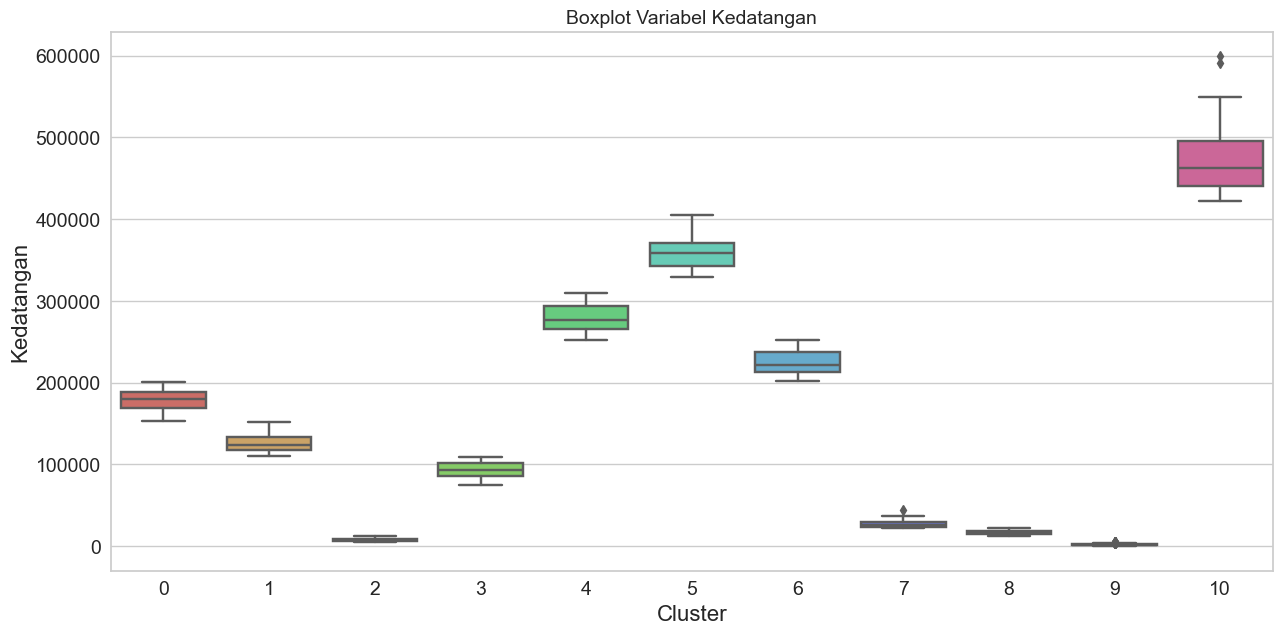

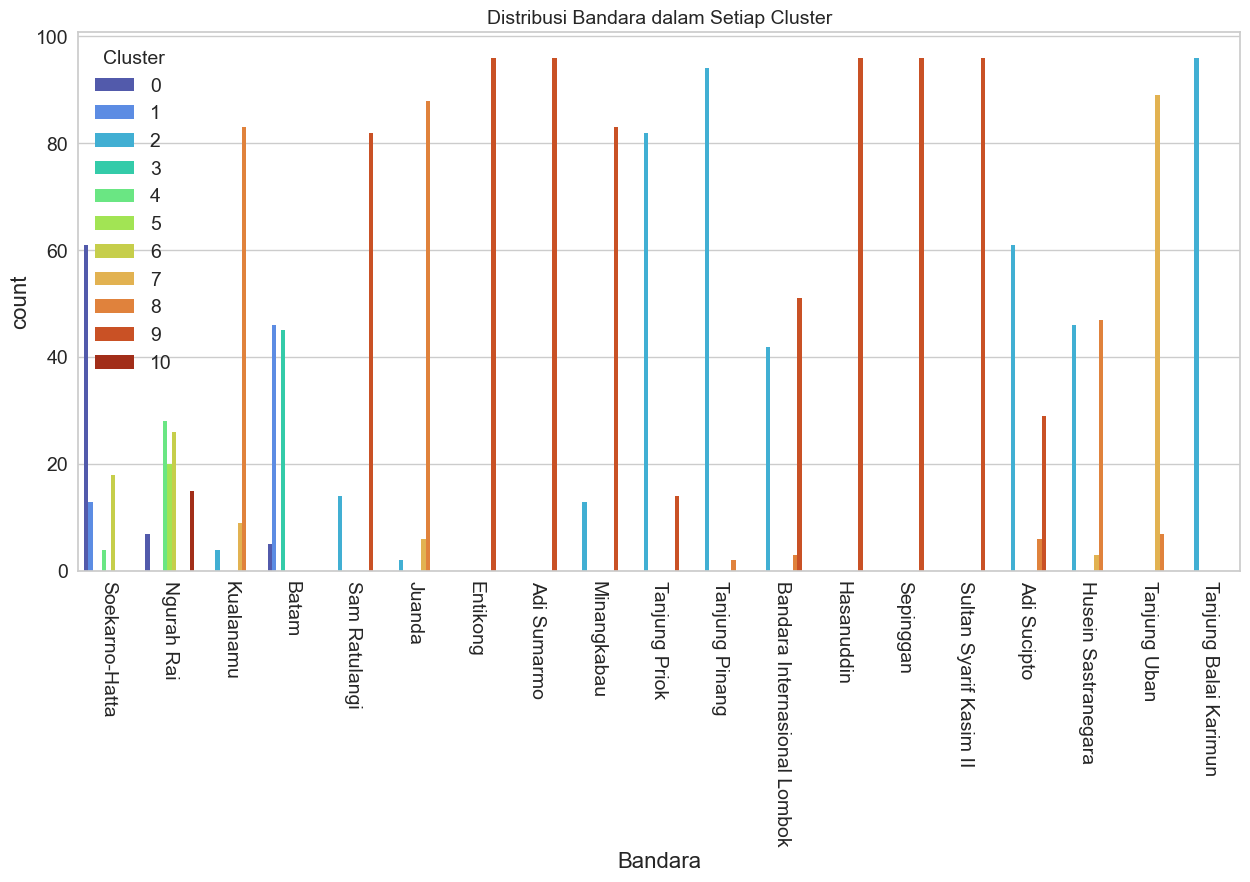

Rentang Data Setiap Cluster
Jumlah Cluster --> 2
Cluster 1: dari 0 - 120.351
Cluster 0: dari 121.253 - 599.302

Jumlah Cluster --> 3
Cluster 1: dari 89.250 - 266.453
Cluster 0: dari 0 - 87.776
Cluster 2: dari 268.418 - 599.302

Jumlah Cluster --> 4
Cluster 1: dari 74.511 - 171.907
Cluster 2: dari 173.906 - 309.888
Cluster 0: dari 0 - 44.525
Cluster 3: dari 329.654 - 599.302

Jumlah Cluster --> 5
Cluster 2: dari 74.511 - 177.335
Cluster 3: dari 178.358 - 309.888
Cluster 1: dari 0 - 12.127
Cluster 4: dari 12.169 - 44.525
Cluster 0: dari 329.654 - 599.302

Jumlah Cluster --> 6
Cluster 2: dari 74.511 - 151.989
Cluster 3: dari 153.300 - 239.400
Cluster 0: dari 241.108 - 367.370
Cluster 1: dari 0 - 11.718
Cluster 5: dari 11.761 - 44.525
Cluster 4: dari 379.397 - 599.302

Jumlah Cluster --> 7
Cluster 1: dari 74.511 - 147.579
Cluster 5: dari 148.920 - 220.508
Cluster 3: dari 222.497 - 307.321
Cluster 4: dari 0 - 11.674
Cluster 2: dari 11.690 - 44.525
Cluster 0: dari 309.051 - 405.686
Cluster 6

In [45]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
all_cluster_stats = []
score = []

for cluster in n_clusters:
    fcm_labels, silhouette, davies = fcm_train(cluster)
    cluster_stats = fcm_show_plot(fcm_labels,cluster)
    all_cluster_stats.extend(cluster_stats)

    score.append(f"{cluster} \t\t| {silhouette} \t\t| {davies}")

# Print all the cluster statistics
print('Rentang Data Setiap Cluster')


for stat in all_cluster_stats:
    print(stat)

print('Jumlah Cluster \t| Silhouette Score \t| Davies Index')
for score in score:
    print(score)